In [37]:
#https://machinelearningmastery.com/timedistributed-layer-for-long-short-term-memory-networks-in-python/
import sys 
import json
import numpy as np # linear algebra
import matplotlib.pyplot as plt # this is used for the plot the graph 
import math
import collections
import pandas as pd
from sklearn.preprocessing import StandardScaler

## for Deep-learing:
import keras
import tensorflow as tf
from keras import backend as K
from keras.layers import LSTM
from keras.layers import Dense, Activation
from keras.layers import Dropout
from keras.models import Sequential
from keras.layers import TimeDistributed
from keras.layers import Lambda
from keras.models import model_from_json
from tensorflow.python.keras.callbacks import TensorBoard

from itertools import product
from functools import partial
from time import time

from core.DataExploration import DataExploration
from core.ModelIndicators import ModelIndicators
from ruptura.CreateBatch import CreateBatch
from ruptura.RupturaPrediction import RupturaPrediction
from ruptura.RupturaNeuralNetwork import RupturaNeuralNetwork
from ruptura.CalculateScore import CalculateScore

def defineLossWeights(yUnknow):
    weigths = []
    for y in yUnknow:
        if y == 0:
            weigths.append(1)
        else:
            weigths.append(0.1)
    return weigths


In [38]:
train = pd.read_csv('ruptura-treino.csv',sep=';')
valid = pd.read_csv('ruptura-validacao.csv',sep=';')
test = pd.read_csv('ruptura-teste.csv',sep=';')

In [39]:
FEAUTURES = ['presenca1',
       'estoque1', 'status1', 'datadist1', 'presenca2', 'estoque2', 'status2',
       'datadist2', 'presenca3', 'estoque3', 'status3', 'datadist3',
       'presenca4', 'estoque4', 'status4', 'datadist4', 'presenca5',
       'estoque5', 'status5', 'datadist5']
TARGET = ['y']

In [40]:
Xtrain = train.loc[:,FEAUTURES].copy()
Ytrain = train.loc[:,TARGET].copy()
Xvalid = valid.loc[:,FEAUTURES].copy()
Yvalid = valid.loc[:,TARGET].copy()
Xtest = test.loc[:,FEAUTURES].copy()
Ytest = test.loc[:,TARGET].copy()


In [41]:
scaler = StandardScaler()
scaler.fit(Xtrain)
Xtrain = scaler.transform(Xtrain)
Xvalid = scaler.transform(Xvalid)
Xtest = scaler.transform(Xtest)

C:\Users\frederico\Miniconda3\envs\TENSOR-GPU\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\frederico\Miniconda3\envs\TENSOR-GPU\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\frederico\Miniconda3\envs\TENSOR-GPU\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.
C:\Users\frederico\Miniconda3\envs\TENSOR-GPU\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """


In [42]:
model = Sequential([
    Dense(100, input_dim=Xtrain.shape[1]),
    Activation('relu'),
    Dense(1000),
    Activation('relu'),
    Dense(100),
    Activation('relu'),
    Dense(1)
])
model.compile(
    loss='mean_squared_error',
    optimizer='sgd')

In [43]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 100)               2100      
_________________________________________________________________
activation_12 (Activation)   (None, 100)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 1000)              101000    
_________________________________________________________________
activation_13 (Activation)   (None, 1000)              0         
_________________________________________________________________
dense_18 (Dense)             (None, 100)               100100    
_________________________________________________________________
activation_14 (Activation)   (None, 100)               0         
_________________________________________________________________
dense_19 (Dense)             (None, 1)                 101       
Total para

In [59]:
batch_size = 128
for step in range(100):
    n_epoch = 100
    model.fit(Xtrain, 
              Ytrain, 
              epochs=n_epoch, 
              batch_size= batch_size, 
              validation_data=(Xvalid, Yvalid),
              verbose=2)
    

Train on 37194 samples, validate on 363 samples
Epoch 1/100
 - 1s - loss: 0.0297 - val_loss: 0.1173
Epoch 2/100
 - 1s - loss: 0.0299 - val_loss: 0.1124
Epoch 3/100
 - 1s - loss: 0.0295 - val_loss: 0.1126
Epoch 4/100
 - 1s - loss: 0.0295 - val_loss: 0.1162
Epoch 5/100
 - 1s - loss: 0.0298 - val_loss: 0.1119
Epoch 6/100
 - 1s - loss: 0.0298 - val_loss: 0.1136
Epoch 7/100
 - 1s - loss: 0.0297 - val_loss: 0.1078
Epoch 8/100
 - 1s - loss: 0.0299 - val_loss: 0.1088
Epoch 9/100
 - 1s - loss: 0.0299 - val_loss: 0.1163
Epoch 10/100
 - 1s - loss: 0.0305 - val_loss: 0.1091
Epoch 11/100
 - 1s - loss: 0.0298 - val_loss: 0.1115
Epoch 12/100
 - 1s - loss: 0.0304 - val_loss: 0.1121
Epoch 13/100
 - 1s - loss: 0.0295 - val_loss: 0.1069
Epoch 14/100
 - 1s - loss: 0.0298 - val_loss: 0.1081
Epoch 15/100
 - 1s - loss: 0.0299 - val_loss: 0.1097
Epoch 16/100
 - 1s - loss: 0.0300 - val_loss: 0.1102
Epoch 17/100
 - 1s - loss: 0.0304 - val_loss: 0.1089
Epoch 18/100
 - 1s - loss: 0.0299 - val_loss: 0.1082
Epoch 1

 - 1s - loss: 0.0298 - val_loss: 0.1153
Epoch 55/100
 - 1s - loss: 0.0295 - val_loss: 0.1141
Epoch 56/100
 - 1s - loss: 0.0294 - val_loss: 0.1124
Epoch 57/100
 - 1s - loss: 0.0293 - val_loss: 0.1126
Epoch 58/100
 - 1s - loss: 0.0296 - val_loss: 0.1095
Epoch 59/100
 - 1s - loss: 0.0297 - val_loss: 0.1077
Epoch 60/100
 - 1s - loss: 0.0295 - val_loss: 0.1085
Epoch 61/100
 - 1s - loss: 0.0294 - val_loss: 0.1073
Epoch 62/100
 - 1s - loss: 0.0294 - val_loss: 0.1085
Epoch 63/100
 - 1s - loss: 0.0293 - val_loss: 0.1083
Epoch 64/100
 - 1s - loss: 0.0291 - val_loss: 0.1084
Epoch 65/100
 - 1s - loss: 0.0297 - val_loss: 0.1095
Epoch 66/100
 - 1s - loss: 0.0293 - val_loss: 0.1107
Epoch 67/100
 - 1s - loss: 0.0296 - val_loss: 0.1095
Epoch 68/100
 - 1s - loss: 0.0293 - val_loss: 0.1146
Epoch 69/100
 - 1s - loss: 0.0298 - val_loss: 0.1272
Epoch 70/100
 - 1s - loss: 0.0291 - val_loss: 0.1095
Epoch 71/100
 - 1s - loss: 0.0293 - val_loss: 0.1091
Epoch 72/100
 - 1s - loss: 0.0291 - val_loss: 0.1077
Epoch 

Epoch 8/100
 - 1s - loss: 0.0291 - val_loss: 0.1084
Epoch 9/100
 - 1s - loss: 0.0289 - val_loss: 0.1081
Epoch 10/100
 - 1s - loss: 0.0292 - val_loss: 0.1232
Epoch 11/100
 - 1s - loss: 0.0290 - val_loss: 0.1118
Epoch 12/100
 - 1s - loss: 0.0291 - val_loss: 0.1133
Epoch 13/100
 - 1s - loss: 0.0286 - val_loss: 0.1122
Epoch 14/100
 - 1s - loss: 0.0285 - val_loss: 0.1087
Epoch 15/100
 - 1s - loss: 0.0288 - val_loss: 0.1131
Epoch 16/100
 - 1s - loss: 0.0290 - val_loss: 0.1104
Epoch 17/100
 - 1s - loss: 0.0293 - val_loss: 0.1147
Epoch 18/100
 - 1s - loss: 0.0293 - val_loss: 0.1076
Epoch 19/100
 - 1s - loss: 0.0293 - val_loss: 0.1093
Epoch 20/100
 - 1s - loss: 0.0291 - val_loss: 0.1099
Epoch 21/100
 - 1s - loss: 0.0291 - val_loss: 0.1087
Epoch 22/100
 - 1s - loss: 0.0293 - val_loss: 0.1103
Epoch 23/100
 - 1s - loss: 0.0289 - val_loss: 0.1111
Epoch 24/100
 - 1s - loss: 0.0289 - val_loss: 0.1123
Epoch 25/100
 - 1s - loss: 0.0287 - val_loss: 0.1132
Epoch 26/100
 - 1s - loss: 0.0287 - val_loss: 0.

Epoch 62/100
 - 1s - loss: 0.0289 - val_loss: 0.1121
Epoch 63/100
 - 1s - loss: 0.0288 - val_loss: 0.1173
Epoch 64/100
 - 1s - loss: 0.0287 - val_loss: 0.1093
Epoch 65/100
 - 1s - loss: 0.0291 - val_loss: 0.1131
Epoch 66/100
 - 1s - loss: 0.0293 - val_loss: 0.1158
Epoch 67/100
 - 1s - loss: 0.0293 - val_loss: 0.1121
Epoch 68/100
 - 1s - loss: 0.0290 - val_loss: 0.1105
Epoch 69/100
 - 1s - loss: 0.0285 - val_loss: 0.1178
Epoch 70/100
 - 1s - loss: 0.0285 - val_loss: 0.1107
Epoch 71/100
 - 1s - loss: 0.0284 - val_loss: 0.1179
Epoch 72/100
 - 1s - loss: 0.0283 - val_loss: 0.1120
Epoch 73/100
 - 1s - loss: 0.0285 - val_loss: 0.1107
Epoch 74/100
 - 1s - loss: 0.0286 - val_loss: 0.1126
Epoch 75/100
 - 1s - loss: 0.0288 - val_loss: 0.1190
Epoch 76/100
 - 1s - loss: 0.0291 - val_loss: 0.1129
Epoch 77/100
 - 1s - loss: 0.0289 - val_loss: 0.1147
Epoch 78/100
 - 1s - loss: 0.0287 - val_loss: 0.1113
Epoch 79/100
 - 1s - loss: 0.0289 - val_loss: 0.1130
Epoch 80/100
 - 1s - loss: 0.0286 - val_loss: 

 - 1s - loss: 0.0285 - val_loss: 0.1115
Epoch 16/100
 - 1s - loss: 0.0282 - val_loss: 0.1095
Epoch 17/100
 - 1s - loss: 0.0286 - val_loss: 0.1101
Epoch 18/100
 - 1s - loss: 0.0279 - val_loss: 0.1093
Epoch 19/100
 - 1s - loss: 0.0283 - val_loss: 0.1088
Epoch 20/100
 - 1s - loss: 0.0284 - val_loss: 0.1100
Epoch 21/100
 - 1s - loss: 0.0286 - val_loss: 0.1153
Epoch 22/100
 - 1s - loss: 0.0285 - val_loss: 0.1207
Epoch 23/100
 - 1s - loss: 0.0282 - val_loss: 0.1144
Epoch 24/100
 - 1s - loss: 0.0284 - val_loss: 0.1123
Epoch 25/100
 - 1s - loss: 0.0284 - val_loss: 0.1122
Epoch 26/100
 - 1s - loss: 0.0282 - val_loss: 0.1136
Epoch 27/100
 - 1s - loss: 0.0285 - val_loss: 0.1122
Epoch 28/100
 - 1s - loss: 0.0282 - val_loss: 0.1115
Epoch 29/100
 - 1s - loss: 0.0282 - val_loss: 0.1229
Epoch 30/100
 - 1s - loss: 0.0284 - val_loss: 0.1102
Epoch 31/100
 - 1s - loss: 0.0283 - val_loss: 0.1133
Epoch 32/100
 - 1s - loss: 0.0282 - val_loss: 0.1134
Epoch 33/100
 - 1s - loss: 0.0283 - val_loss: 0.1142
Epoch 

 - 1s - loss: 0.0279 - val_loss: 0.1115
Epoch 70/100
 - 1s - loss: 0.0281 - val_loss: 0.1237
Epoch 71/100
 - 1s - loss: 0.0283 - val_loss: 0.1115
Epoch 72/100
 - 1s - loss: 0.0282 - val_loss: 0.1102
Epoch 73/100
 - 1s - loss: 0.0283 - val_loss: 0.1123
Epoch 74/100
 - 1s - loss: 0.0284 - val_loss: 0.1123
Epoch 75/100
 - 1s - loss: 0.0282 - val_loss: 0.1136
Epoch 76/100
 - 1s - loss: 0.0281 - val_loss: 0.1163
Epoch 77/100
 - 1s - loss: 0.0278 - val_loss: 0.1133
Epoch 78/100
 - 1s - loss: 0.0283 - val_loss: 0.1117
Epoch 79/100
 - 1s - loss: 0.0281 - val_loss: 0.1121
Epoch 80/100
 - 1s - loss: 0.0283 - val_loss: 0.1099
Epoch 81/100
 - 1s - loss: 0.0281 - val_loss: 0.1131
Epoch 82/100
 - 1s - loss: 0.0280 - val_loss: 0.1150
Epoch 83/100
 - 1s - loss: 0.0281 - val_loss: 0.1150
Epoch 84/100
 - 1s - loss: 0.0279 - val_loss: 0.1114
Epoch 85/100
 - 1s - loss: 0.0280 - val_loss: 0.1100
Epoch 86/100
 - 1s - loss: 0.0280 - val_loss: 0.1149
Epoch 87/100
 - 1s - loss: 0.0283 - val_loss: 0.1112
Epoch 

Epoch 23/100
 - 1s - loss: 0.0278 - val_loss: 0.1137
Epoch 24/100
 - 1s - loss: 0.0278 - val_loss: 0.1109
Epoch 25/100
 - 1s - loss: 0.0278 - val_loss: 0.1121
Epoch 26/100
 - 1s - loss: 0.0278 - val_loss: 0.1125
Epoch 27/100
 - 1s - loss: 0.0280 - val_loss: 0.1116
Epoch 28/100
 - 1s - loss: 0.0282 - val_loss: 0.1098
Epoch 29/100
 - 1s - loss: 0.0276 - val_loss: 0.1129
Epoch 30/100
 - 1s - loss: 0.0278 - val_loss: 0.1105
Epoch 31/100
 - 1s - loss: 0.0276 - val_loss: 0.1146
Epoch 32/100
 - 1s - loss: 0.0277 - val_loss: 0.1112
Epoch 33/100
 - 1s - loss: 0.0276 - val_loss: 0.1111
Epoch 34/100
 - 1s - loss: 0.0278 - val_loss: 0.1128
Epoch 35/100
 - 1s - loss: 0.0280 - val_loss: 0.1116
Epoch 36/100
 - 1s - loss: 0.0279 - val_loss: 0.1168
Epoch 37/100
 - 1s - loss: 0.0280 - val_loss: 0.1133
Epoch 38/100
 - 1s - loss: 0.0277 - val_loss: 0.1124
Epoch 39/100
 - 1s - loss: 0.0282 - val_loss: 0.1123
Epoch 40/100
 - 1s - loss: 0.0278 - val_loss: 0.1155
Epoch 41/100
 - 1s - loss: 0.0280 - val_loss: 

Epoch 77/100
 - 1s - loss: 0.0279 - val_loss: 0.1101
Epoch 78/100
 - 1s - loss: 0.0276 - val_loss: 0.1134
Epoch 79/100
 - 1s - loss: 0.0275 - val_loss: 0.1136
Epoch 80/100
 - 1s - loss: 0.0276 - val_loss: 0.1130
Epoch 81/100
 - 1s - loss: 0.0276 - val_loss: 0.1125
Epoch 82/100
 - 1s - loss: 0.0274 - val_loss: 0.1114
Epoch 83/100
 - 1s - loss: 0.0280 - val_loss: 0.1160
Epoch 84/100
 - 1s - loss: 0.0275 - val_loss: 0.1144
Epoch 85/100
 - 1s - loss: 0.0275 - val_loss: 0.1117
Epoch 86/100
 - 1s - loss: 0.0277 - val_loss: 0.1166
Epoch 87/100
 - 1s - loss: 0.0275 - val_loss: 0.1148
Epoch 88/100
 - 1s - loss: 0.0282 - val_loss: 0.1140
Epoch 89/100
 - 1s - loss: 0.0275 - val_loss: 0.1109
Epoch 90/100
 - 1s - loss: 0.0275 - val_loss: 0.1119
Epoch 91/100
 - 1s - loss: 0.0275 - val_loss: 0.1144
Epoch 92/100
 - 1s - loss: 0.0275 - val_loss: 0.1118
Epoch 93/100
 - 1s - loss: 0.0278 - val_loss: 0.1133
Epoch 94/100
 - 1s - loss: 0.0275 - val_loss: 0.1113
Epoch 95/100
 - 1s - loss: 0.0279 - val_loss: 

 - 1s - loss: 0.0276 - val_loss: 0.1179
Epoch 31/100
 - 1s - loss: 0.0275 - val_loss: 0.1138
Epoch 32/100
 - 1s - loss: 0.0275 - val_loss: 0.1110
Epoch 33/100
 - 1s - loss: 0.0277 - val_loss: 0.1128
Epoch 34/100
 - 1s - loss: 0.0275 - val_loss: 0.1112
Epoch 35/100
 - 1s - loss: 0.0272 - val_loss: 0.1141
Epoch 36/100
 - 1s - loss: 0.0275 - val_loss: 0.1112
Epoch 37/100
 - 1s - loss: 0.0274 - val_loss: 0.1126
Epoch 38/100
 - 1s - loss: 0.0275 - val_loss: 0.1134
Epoch 39/100
 - 1s - loss: 0.0273 - val_loss: 0.1123
Epoch 40/100
 - 1s - loss: 0.0274 - val_loss: 0.1129
Epoch 41/100
 - 1s - loss: 0.0274 - val_loss: 0.1110
Epoch 42/100
 - 1s - loss: 0.0274 - val_loss: 0.1113
Epoch 43/100
 - 1s - loss: 0.0276 - val_loss: 0.1131
Epoch 44/100
 - 1s - loss: 0.0275 - val_loss: 0.1128
Epoch 45/100
 - 1s - loss: 0.0275 - val_loss: 0.1111
Epoch 46/100
 - 1s - loss: 0.0274 - val_loss: 0.1114
Epoch 47/100
 - 1s - loss: 0.0276 - val_loss: 0.1116
Epoch 48/100
 - 1s - loss: 0.0273 - val_loss: 0.1130
Epoch 

 - 1s - loss: 0.0276 - val_loss: 0.1160
Epoch 85/100
 - 1s - loss: 0.0270 - val_loss: 0.1116
Epoch 86/100
 - 1s - loss: 0.0273 - val_loss: 0.1156
Epoch 87/100
 - 1s - loss: 0.0275 - val_loss: 0.1113
Epoch 88/100
 - 1s - loss: 0.0273 - val_loss: 0.1115
Epoch 89/100
 - 1s - loss: 0.0274 - val_loss: 0.1128
Epoch 90/100
 - 1s - loss: 0.0276 - val_loss: 0.1123
Epoch 91/100
 - 1s - loss: 0.0273 - val_loss: 0.1196
Epoch 92/100
 - 1s - loss: 0.0272 - val_loss: 0.1143
Epoch 93/100
 - 1s - loss: 0.0272 - val_loss: 0.1138
Epoch 94/100
 - 1s - loss: 0.0273 - val_loss: 0.1139
Epoch 95/100
 - 1s - loss: 0.0274 - val_loss: 0.1137
Epoch 96/100
 - 1s - loss: 0.0272 - val_loss: 0.1142
Epoch 97/100
 - 1s - loss: 0.0273 - val_loss: 0.1138
Epoch 98/100
 - 1s - loss: 0.0271 - val_loss: 0.1106
Epoch 99/100
 - 1s - loss: 0.0273 - val_loss: 0.1144
Epoch 100/100
 - 1s - loss: 0.0273 - val_loss: 0.1142
Train on 37194 samples, validate on 363 samples
Epoch 1/100
 - 1s - loss: 0.0272 - val_loss: 0.1104
Epoch 2/100

Epoch 38/100
 - 1s - loss: 0.0271 - val_loss: 0.1140
Epoch 39/100
 - 1s - loss: 0.0271 - val_loss: 0.1166
Epoch 40/100
 - 1s - loss: 0.0270 - val_loss: 0.1115
Epoch 41/100
 - 1s - loss: 0.0270 - val_loss: 0.1137
Epoch 42/100
 - 1s - loss: 0.0271 - val_loss: 0.1133
Epoch 43/100
 - 1s - loss: 0.0270 - val_loss: 0.1159
Epoch 44/100
 - 1s - loss: 0.0270 - val_loss: 0.1209
Epoch 45/100
 - 1s - loss: 0.0273 - val_loss: 0.1116
Epoch 46/100
 - 1s - loss: 0.0271 - val_loss: 0.1127
Epoch 47/100
 - 1s - loss: 0.0269 - val_loss: 0.1135
Epoch 48/100
 - 1s - loss: 0.0270 - val_loss: 0.1189
Epoch 49/100
 - 1s - loss: 0.0271 - val_loss: 0.1151
Epoch 50/100
 - 1s - loss: 0.0270 - val_loss: 0.1112
Epoch 51/100
 - 1s - loss: 0.0270 - val_loss: 0.1153
Epoch 52/100
 - 1s - loss: 0.0269 - val_loss: 0.1125
Epoch 53/100
 - 1s - loss: 0.0271 - val_loss: 0.1130
Epoch 54/100
 - 1s - loss: 0.0270 - val_loss: 0.1142
Epoch 55/100
 - 1s - loss: 0.0273 - val_loss: 0.1155
Epoch 56/100
 - 1s - loss: 0.0271 - val_loss: 

Epoch 92/100
 - 1s - loss: 0.0269 - val_loss: 0.1151
Epoch 93/100
 - 1s - loss: 0.0272 - val_loss: 0.1150
Epoch 94/100
 - 1s - loss: 0.0270 - val_loss: 0.1163
Epoch 95/100
 - 1s - loss: 0.0270 - val_loss: 0.1137
Epoch 96/100
 - 1s - loss: 0.0269 - val_loss: 0.1143
Epoch 97/100
 - 1s - loss: 0.0270 - val_loss: 0.1114
Epoch 98/100
 - 1s - loss: 0.0269 - val_loss: 0.1134
Epoch 99/100
 - 1s - loss: 0.0268 - val_loss: 0.1120
Epoch 100/100
 - 1s - loss: 0.0271 - val_loss: 0.1115
Train on 37194 samples, validate on 363 samples
Epoch 1/100
 - 1s - loss: 0.0270 - val_loss: 0.1143
Epoch 2/100
 - 1s - loss: 0.0271 - val_loss: 0.1132
Epoch 3/100
 - 1s - loss: 0.0268 - val_loss: 0.1129
Epoch 4/100
 - 1s - loss: 0.0270 - val_loss: 0.1137
Epoch 5/100
 - 1s - loss: 0.0269 - val_loss: 0.1121
Epoch 6/100
 - 1s - loss: 0.0267 - val_loss: 0.1128
Epoch 7/100
 - 1s - loss: 0.0270 - val_loss: 0.1105
Epoch 8/100
 - 1s - loss: 0.0268 - val_loss: 0.1134
Epoch 9/100
 - 1s - loss: 0.0269 - val_loss: 0.1117
Epoch 

 - 1s - loss: 0.0267 - val_loss: 0.1129
Epoch 46/100
 - 1s - loss: 0.0270 - val_loss: 0.1120
Epoch 47/100
 - 1s - loss: 0.0268 - val_loss: 0.1166
Epoch 48/100
 - 1s - loss: 0.0270 - val_loss: 0.1156
Epoch 49/100
 - 1s - loss: 0.0268 - val_loss: 0.1132
Epoch 50/100
 - 1s - loss: 0.0268 - val_loss: 0.1179
Epoch 51/100
 - 1s - loss: 0.0268 - val_loss: 0.1106
Epoch 52/100
 - 1s - loss: 0.0268 - val_loss: 0.1151
Epoch 53/100
 - 1s - loss: 0.0266 - val_loss: 0.1134
Epoch 54/100
 - 1s - loss: 0.0268 - val_loss: 0.1165
Epoch 55/100
 - 1s - loss: 0.0268 - val_loss: 0.1122
Epoch 56/100
 - 1s - loss: 0.0268 - val_loss: 0.1132
Epoch 57/100
 - 1s - loss: 0.0266 - val_loss: 0.1126
Epoch 58/100
 - 1s - loss: 0.0266 - val_loss: 0.1201
Epoch 59/100
 - 1s - loss: 0.0268 - val_loss: 0.1131
Epoch 60/100
 - 1s - loss: 0.0268 - val_loss: 0.1159
Epoch 61/100
 - 1s - loss: 0.0268 - val_loss: 0.1194
Epoch 62/100
 - 1s - loss: 0.0267 - val_loss: 0.1148
Epoch 63/100
 - 1s - loss: 0.0269 - val_loss: 0.1178
Epoch 

 - 1s - loss: 0.0266 - val_loss: 0.1169
Epoch 100/100
 - 1s - loss: 0.0266 - val_loss: 0.1131
Train on 37194 samples, validate on 363 samples
Epoch 1/100
 - 1s - loss: 0.0265 - val_loss: 0.1133
Epoch 2/100
 - 1s - loss: 0.0267 - val_loss: 0.1150
Epoch 3/100
 - 1s - loss: 0.0267 - val_loss: 0.1153
Epoch 4/100
 - 1s - loss: 0.0267 - val_loss: 0.1136
Epoch 5/100
 - 1s - loss: 0.0265 - val_loss: 0.1145
Epoch 6/100
 - 1s - loss: 0.0267 - val_loss: 0.1127
Epoch 7/100
 - 1s - loss: 0.0267 - val_loss: 0.1139
Epoch 8/100
 - 1s - loss: 0.0267 - val_loss: 0.1157
Epoch 9/100
 - 1s - loss: 0.0267 - val_loss: 0.1132
Epoch 10/100
 - 1s - loss: 0.0268 - val_loss: 0.1200
Epoch 11/100
 - 1s - loss: 0.0266 - val_loss: 0.1147
Epoch 12/100
 - 1s - loss: 0.0267 - val_loss: 0.1137
Epoch 13/100
 - 1s - loss: 0.0266 - val_loss: 0.1116
Epoch 14/100
 - 1s - loss: 0.0265 - val_loss: 0.1132
Epoch 15/100
 - 1s - loss: 0.0265 - val_loss: 0.1129
Epoch 16/100
 - 1s - loss: 0.0270 - val_loss: 0.1124
Epoch 17/100
 - 1s 

Epoch 53/100
 - 1s - loss: 0.0266 - val_loss: 0.1156
Epoch 54/100
 - 1s - loss: 0.0264 - val_loss: 0.1135
Epoch 55/100
 - 1s - loss: 0.0265 - val_loss: 0.1176
Epoch 56/100
 - 1s - loss: 0.0264 - val_loss: 0.1136
Epoch 57/100
 - 1s - loss: 0.0267 - val_loss: 0.1139
Epoch 58/100
 - 1s - loss: 0.0264 - val_loss: 0.1142
Epoch 59/100
 - 1s - loss: 0.0264 - val_loss: 0.1156
Epoch 60/100
 - 1s - loss: 0.0266 - val_loss: 0.1118
Epoch 61/100
 - 1s - loss: 0.0266 - val_loss: 0.1145
Epoch 62/100
 - 1s - loss: 0.0265 - val_loss: 0.1142
Epoch 63/100
 - 1s - loss: 0.0267 - val_loss: 0.1181
Epoch 64/100
 - 1s - loss: 0.0265 - val_loss: 0.1153
Epoch 65/100
 - 1s - loss: 0.0263 - val_loss: 0.1138
Epoch 66/100
 - 1s - loss: 0.0268 - val_loss: 0.1119
Epoch 67/100
 - 1s - loss: 0.0266 - val_loss: 0.1128
Epoch 68/100
 - 1s - loss: 0.0266 - val_loss: 0.1123
Epoch 69/100
 - 1s - loss: 0.0268 - val_loss: 0.1109
Epoch 70/100
 - 1s - loss: 0.0267 - val_loss: 0.1128
Epoch 71/100
 - 1s - loss: 0.0264 - val_loss: 

Epoch 6/100
 - 1s - loss: 0.0264 - val_loss: 0.1121
Epoch 7/100
 - 1s - loss: 0.0265 - val_loss: 0.1125
Epoch 8/100
 - 1s - loss: 0.0264 - val_loss: 0.1117
Epoch 9/100
 - 1s - loss: 0.0263 - val_loss: 0.1156
Epoch 10/100
 - 1s - loss: 0.0264 - val_loss: 0.1123
Epoch 11/100
 - 1s - loss: 0.0264 - val_loss: 0.1137
Epoch 12/100
 - 1s - loss: 0.0264 - val_loss: 0.1109
Epoch 13/100
 - 1s - loss: 0.0264 - val_loss: 0.1122
Epoch 14/100
 - 1s - loss: 0.0264 - val_loss: 0.1125
Epoch 15/100
 - 1s - loss: 0.0265 - val_loss: 0.1125
Epoch 16/100
 - 1s - loss: 0.0265 - val_loss: 0.1151
Epoch 17/100
 - 1s - loss: 0.0262 - val_loss: 0.1133
Epoch 18/100
 - 1s - loss: 0.0266 - val_loss: 0.1131
Epoch 19/100
 - 1s - loss: 0.0263 - val_loss: 0.1189
Epoch 20/100
 - 1s - loss: 0.0266 - val_loss: 0.1172
Epoch 21/100
 - 1s - loss: 0.0265 - val_loss: 0.1124
Epoch 22/100
 - 1s - loss: 0.0265 - val_loss: 0.1139
Epoch 23/100
 - 1s - loss: 0.0262 - val_loss: 0.1127
Epoch 24/100
 - 1s - loss: 0.0266 - val_loss: 0.11

Epoch 60/100
 - 1s - loss: 0.0263 - val_loss: 0.1131
Epoch 61/100
 - 1s - loss: 0.0263 - val_loss: 0.1143
Epoch 62/100
 - 1s - loss: 0.0263 - val_loss: 0.1136
Epoch 63/100
 - 1s - loss: 0.0265 - val_loss: 0.1109
Epoch 64/100
 - 1s - loss: 0.0262 - val_loss: 0.1138
Epoch 65/100
 - 1s - loss: 0.0264 - val_loss: 0.1134
Epoch 66/100
 - 1s - loss: 0.0263 - val_loss: 0.1141
Epoch 67/100
 - 1s - loss: 0.0263 - val_loss: 0.1166
Epoch 68/100
 - 1s - loss: 0.0264 - val_loss: 0.1121
Epoch 69/100
 - 1s - loss: 0.0264 - val_loss: 0.1133
Epoch 70/100
 - 1s - loss: 0.0264 - val_loss: 0.1127
Epoch 71/100
 - 1s - loss: 0.0264 - val_loss: 0.1150
Epoch 72/100
 - 1s - loss: 0.0263 - val_loss: 0.1116
Epoch 73/100
 - 1s - loss: 0.0265 - val_loss: 0.1146
Epoch 74/100
 - 1s - loss: 0.0262 - val_loss: 0.1135
Epoch 75/100
 - 1s - loss: 0.0264 - val_loss: 0.1117
Epoch 76/100
 - 1s - loss: 0.0264 - val_loss: 0.1133
Epoch 77/100
 - 1s - loss: 0.0264 - val_loss: 0.1131
Epoch 78/100
 - 1s - loss: 0.0263 - val_loss: 

 - 1s - loss: 0.0265 - val_loss: 0.1130
Epoch 14/100
 - 1s - loss: 0.0262 - val_loss: 0.1129
Epoch 15/100
 - 1s - loss: 0.0263 - val_loss: 0.1142
Epoch 16/100
 - 1s - loss: 0.0261 - val_loss: 0.1151
Epoch 17/100
 - 1s - loss: 0.0262 - val_loss: 0.1115
Epoch 18/100
 - 1s - loss: 0.0263 - val_loss: 0.1132
Epoch 19/100
 - 1s - loss: 0.0262 - val_loss: 0.1133
Epoch 20/100
 - 1s - loss: 0.0261 - val_loss: 0.1154
Epoch 21/100
 - 1s - loss: 0.0261 - val_loss: 0.1176
Epoch 22/100
 - 1s - loss: 0.0263 - val_loss: 0.1120
Epoch 23/100
 - 1s - loss: 0.0262 - val_loss: 0.1135
Epoch 24/100
 - 1s - loss: 0.0265 - val_loss: 0.1131
Epoch 25/100
 - 1s - loss: 0.0262 - val_loss: 0.1128
Epoch 26/100
 - 1s - loss: 0.0261 - val_loss: 0.1165
Epoch 27/100
 - 1s - loss: 0.0263 - val_loss: 0.1185
Epoch 28/100
 - 1s - loss: 0.0262 - val_loss: 0.1132
Epoch 29/100
 - 1s - loss: 0.0262 - val_loss: 0.1150
Epoch 30/100
 - 1s - loss: 0.0263 - val_loss: 0.1151
Epoch 31/100
 - 1s - loss: 0.0264 - val_loss: 0.1128
Epoch 

 - 1s - loss: 0.0262 - val_loss: 0.1137
Epoch 68/100
 - 1s - loss: 0.0261 - val_loss: 0.1127
Epoch 69/100
 - 1s - loss: 0.0263 - val_loss: 0.1127
Epoch 70/100
 - 1s - loss: 0.0260 - val_loss: 0.1154
Epoch 71/100
 - 1s - loss: 0.0262 - val_loss: 0.1126
Epoch 72/100
 - 1s - loss: 0.0261 - val_loss: 0.1137
Epoch 73/100
 - 1s - loss: 0.0260 - val_loss: 0.1141
Epoch 74/100
 - 1s - loss: 0.0261 - val_loss: 0.1159
Epoch 75/100
 - 1s - loss: 0.0264 - val_loss: 0.1138
Epoch 76/100
 - 1s - loss: 0.0261 - val_loss: 0.1125
Epoch 77/100
 - 1s - loss: 0.0261 - val_loss: 0.1149
Epoch 78/100
 - 1s - loss: 0.0261 - val_loss: 0.1119
Epoch 79/100
 - 1s - loss: 0.0262 - val_loss: 0.1145
Epoch 80/100
 - 1s - loss: 0.0261 - val_loss: 0.1125
Epoch 81/100
 - 1s - loss: 0.0263 - val_loss: 0.1183
Epoch 82/100
 - 1s - loss: 0.0261 - val_loss: 0.1128
Epoch 83/100
 - 1s - loss: 0.0262 - val_loss: 0.1123
Epoch 84/100
 - 1s - loss: 0.0261 - val_loss: 0.1130
Epoch 85/100
 - 1s - loss: 0.0261 - val_loss: 0.1131
Epoch 

Epoch 21/100
 - 1s - loss: 0.0261 - val_loss: 0.1131
Epoch 22/100
 - 1s - loss: 0.0261 - val_loss: 0.1114
Epoch 23/100
 - 1s - loss: 0.0259 - val_loss: 0.1130
Epoch 24/100
 - 1s - loss: 0.0259 - val_loss: 0.1122
Epoch 25/100
 - 1s - loss: 0.0262 - val_loss: 0.1129
Epoch 26/100
 - 1s - loss: 0.0261 - val_loss: 0.1156
Epoch 27/100
 - 1s - loss: 0.0262 - val_loss: 0.1150
Epoch 28/100
 - 1s - loss: 0.0262 - val_loss: 0.1122
Epoch 29/100
 - 1s - loss: 0.0261 - val_loss: 0.1144
Epoch 30/100
 - 1s - loss: 0.0260 - val_loss: 0.1124
Epoch 31/100
 - 1s - loss: 0.0261 - val_loss: 0.1144
Epoch 32/100
 - 1s - loss: 0.0259 - val_loss: 0.1115
Epoch 33/100
 - 1s - loss: 0.0260 - val_loss: 0.1122
Epoch 34/100
 - 1s - loss: 0.0261 - val_loss: 0.1139
Epoch 35/100
 - 1s - loss: 0.0260 - val_loss: 0.1136
Epoch 36/100
 - 1s - loss: 0.0261 - val_loss: 0.1123
Epoch 37/100
 - 1s - loss: 0.0260 - val_loss: 0.1142
Epoch 38/100
 - 1s - loss: 0.0260 - val_loss: 0.1131
Epoch 39/100
 - 1s - loss: 0.0260 - val_loss: 

Epoch 75/100
 - 1s - loss: 0.0258 - val_loss: 0.1121
Epoch 76/100
 - 1s - loss: 0.0260 - val_loss: 0.1137
Epoch 77/100
 - 1s - loss: 0.0260 - val_loss: 0.1140
Epoch 78/100
 - 1s - loss: 0.0259 - val_loss: 0.1143
Epoch 79/100
 - 1s - loss: 0.0259 - val_loss: 0.1140
Epoch 80/100
 - 1s - loss: 0.0260 - val_loss: 0.1196
Epoch 81/100
 - 1s - loss: 0.0261 - val_loss: 0.1133
Epoch 82/100
 - 1s - loss: 0.0259 - val_loss: 0.1115
Epoch 83/100
 - 1s - loss: 0.0260 - val_loss: 0.1149
Epoch 84/100
 - 1s - loss: 0.0260 - val_loss: 0.1145
Epoch 85/100
 - 1s - loss: 0.0262 - val_loss: 0.1142
Epoch 86/100
 - 1s - loss: 0.0260 - val_loss: 0.1125
Epoch 87/100
 - 1s - loss: 0.0261 - val_loss: 0.1145
Epoch 88/100
 - 1s - loss: 0.0260 - val_loss: 0.1133
Epoch 89/100
 - 1s - loss: 0.0259 - val_loss: 0.1127
Epoch 90/100
 - 1s - loss: 0.0260 - val_loss: 0.1124
Epoch 91/100
 - 1s - loss: 0.0260 - val_loss: 0.1166
Epoch 92/100
 - 1s - loss: 0.0260 - val_loss: 0.1124
Epoch 93/100
 - 1s - loss: 0.0260 - val_loss: 

 - 1s - loss: 0.0259 - val_loss: 0.1130
Epoch 29/100
 - 1s - loss: 0.0259 - val_loss: 0.1139
Epoch 30/100
 - 1s - loss: 0.0258 - val_loss: 0.1128
Epoch 31/100
 - 1s - loss: 0.0259 - val_loss: 0.1140
Epoch 32/100
 - 1s - loss: 0.0259 - val_loss: 0.1125
Epoch 33/100
 - 1s - loss: 0.0261 - val_loss: 0.1123
Epoch 34/100
 - 1s - loss: 0.0259 - val_loss: 0.1155
Epoch 35/100
 - 1s - loss: 0.0259 - val_loss: 0.1161
Epoch 36/100
 - 1s - loss: 0.0260 - val_loss: 0.1121
Epoch 37/100
 - 1s - loss: 0.0261 - val_loss: 0.1134
Epoch 38/100
 - 1s - loss: 0.0260 - val_loss: 0.1135
Epoch 39/100
 - 1s - loss: 0.0260 - val_loss: 0.1118
Epoch 40/100
 - 1s - loss: 0.0259 - val_loss: 0.1118
Epoch 41/100
 - 1s - loss: 0.0258 - val_loss: 0.1144
Epoch 42/100
 - 1s - loss: 0.0259 - val_loss: 0.1139
Epoch 43/100
 - 1s - loss: 0.0259 - val_loss: 0.1167
Epoch 44/100
 - 1s - loss: 0.0260 - val_loss: 0.1139
Epoch 45/100
 - 1s - loss: 0.0259 - val_loss: 0.1130
Epoch 46/100
 - 1s - loss: 0.0259 - val_loss: 0.1174
Epoch 

 - 1s - loss: 0.0259 - val_loss: 0.1144
Epoch 83/100
 - 1s - loss: 0.0259 - val_loss: 0.1146
Epoch 84/100
 - 1s - loss: 0.0259 - val_loss: 0.1154
Epoch 85/100
 - 1s - loss: 0.0258 - val_loss: 0.1142
Epoch 86/100
 - 1s - loss: 0.0258 - val_loss: 0.1138
Epoch 87/100
 - 1s - loss: 0.0258 - val_loss: 0.1140
Epoch 88/100
 - 1s - loss: 0.0259 - val_loss: 0.1124
Epoch 89/100
 - 1s - loss: 0.0259 - val_loss: 0.1138
Epoch 90/100
 - 1s - loss: 0.0259 - val_loss: 0.1124
Epoch 91/100
 - 1s - loss: 0.0259 - val_loss: 0.1149
Epoch 92/100
 - 1s - loss: 0.0258 - val_loss: 0.1136
Epoch 93/100
 - 1s - loss: 0.0258 - val_loss: 0.1124
Epoch 94/100
 - 1s - loss: 0.0257 - val_loss: 0.1127
Epoch 95/100
 - 1s - loss: 0.0260 - val_loss: 0.1138
Epoch 96/100
 - 1s - loss: 0.0259 - val_loss: 0.1128
Epoch 97/100
 - 1s - loss: 0.0258 - val_loss: 0.1129
Epoch 98/100
 - 1s - loss: 0.0259 - val_loss: 0.1162
Epoch 99/100
 - 1s - loss: 0.0258 - val_loss: 0.1127
Epoch 100/100
 - 1s - loss: 0.0259 - val_loss: 0.1128
Train

Epoch 36/100
 - 1s - loss: 0.0259 - val_loss: 0.1142
Epoch 37/100
 - 1s - loss: 0.0258 - val_loss: 0.1122
Epoch 38/100
 - 1s - loss: 0.0259 - val_loss: 0.1126
Epoch 39/100
 - 1s - loss: 0.0260 - val_loss: 0.1147
Epoch 40/100
 - 1s - loss: 0.0258 - val_loss: 0.1126
Epoch 41/100
 - 1s - loss: 0.0259 - val_loss: 0.1144
Epoch 42/100
 - 1s - loss: 0.0259 - val_loss: 0.1142
Epoch 43/100
 - 1s - loss: 0.0259 - val_loss: 0.1150
Epoch 44/100
 - 1s - loss: 0.0258 - val_loss: 0.1128
Epoch 45/100
 - 1s - loss: 0.0257 - val_loss: 0.1127
Epoch 46/100
 - 1s - loss: 0.0258 - val_loss: 0.1129
Epoch 47/100
 - 1s - loss: 0.0257 - val_loss: 0.1158
Epoch 48/100
 - 1s - loss: 0.0259 - val_loss: 0.1141
Epoch 49/100
 - 1s - loss: 0.0258 - val_loss: 0.1123
Epoch 50/100
 - 1s - loss: 0.0259 - val_loss: 0.1148
Epoch 51/100
 - 1s - loss: 0.0258 - val_loss: 0.1172
Epoch 52/100
 - 1s - loss: 0.0258 - val_loss: 0.1133
Epoch 53/100
 - 1s - loss: 0.0259 - val_loss: 0.1142
Epoch 54/100
 - 1s - loss: 0.0258 - val_loss: 

Epoch 90/100
 - 1s - loss: 0.0257 - val_loss: 0.1140
Epoch 91/100
 - 1s - loss: 0.0257 - val_loss: 0.1158
Epoch 92/100
 - 1s - loss: 0.0257 - val_loss: 0.1124
Epoch 93/100
 - 1s - loss: 0.0258 - val_loss: 0.1135
Epoch 94/100
 - 1s - loss: 0.0257 - val_loss: 0.1149
Epoch 95/100
 - 1s - loss: 0.0257 - val_loss: 0.1171
Epoch 96/100
 - 1s - loss: 0.0258 - val_loss: 0.1158
Epoch 97/100
 - 1s - loss: 0.0256 - val_loss: 0.1130
Epoch 98/100
 - 1s - loss: 0.0257 - val_loss: 0.1138
Epoch 99/100
 - 1s - loss: 0.0259 - val_loss: 0.1136
Epoch 100/100
 - 1s - loss: 0.0258 - val_loss: 0.1144
Train on 37194 samples, validate on 363 samples
Epoch 1/100
 - 1s - loss: 0.0256 - val_loss: 0.1161
Epoch 2/100
 - 1s - loss: 0.0259 - val_loss: 0.1121
Epoch 3/100
 - 1s - loss: 0.0258 - val_loss: 0.1124
Epoch 4/100
 - 1s - loss: 0.0258 - val_loss: 0.1129
Epoch 5/100
 - 1s - loss: 0.0257 - val_loss: 0.1154
Epoch 6/100
 - 1s - loss: 0.0257 - val_loss: 0.1143
Epoch 7/100
 - 1s - loss: 0.0258 - val_loss: 0.1139
Epoc

 - 1s - loss: 0.0256 - val_loss: 0.1130
Epoch 44/100
 - 1s - loss: 0.0257 - val_loss: 0.1137
Epoch 45/100
 - 1s - loss: 0.0258 - val_loss: 0.1137
Epoch 46/100
 - 1s - loss: 0.0256 - val_loss: 0.1129
Epoch 47/100
 - 1s - loss: 0.0256 - val_loss: 0.1144
Epoch 48/100
 - 1s - loss: 0.0259 - val_loss: 0.1121
Epoch 49/100
 - 1s - loss: 0.0257 - val_loss: 0.1133
Epoch 50/100
 - 1s - loss: 0.0257 - val_loss: 0.1142
Epoch 51/100
 - 1s - loss: 0.0255 - val_loss: 0.1150
Epoch 52/100
 - 1s - loss: 0.0257 - val_loss: 0.1142
Epoch 53/100
 - 1s - loss: 0.0258 - val_loss: 0.1130
Epoch 54/100
 - 1s - loss: 0.0257 - val_loss: 0.1149
Epoch 55/100
 - 1s - loss: 0.0257 - val_loss: 0.1149
Epoch 56/100
 - 1s - loss: 0.0257 - val_loss: 0.1146
Epoch 57/100
 - 1s - loss: 0.0257 - val_loss: 0.1167
Epoch 58/100
 - 1s - loss: 0.0257 - val_loss: 0.1154
Epoch 59/100
 - 1s - loss: 0.0258 - val_loss: 0.1145
Epoch 60/100
 - 1s - loss: 0.0256 - val_loss: 0.1129
Epoch 61/100
 - 1s - loss: 0.0258 - val_loss: 0.1178
Epoch 

 - 1s - loss: 0.0256 - val_loss: 0.1132
Epoch 98/100
 - 1s - loss: 0.0256 - val_loss: 0.1163
Epoch 99/100
 - 1s - loss: 0.0256 - val_loss: 0.1131
Epoch 100/100
 - 1s - loss: 0.0257 - val_loss: 0.1202
Train on 37194 samples, validate on 363 samples
Epoch 1/100
 - 1s - loss: 0.0256 - val_loss: 0.1137
Epoch 2/100
 - 1s - loss: 0.0255 - val_loss: 0.1133
Epoch 3/100
 - 1s - loss: 0.0256 - val_loss: 0.1151
Epoch 4/100
 - 1s - loss: 0.0257 - val_loss: 0.1182
Epoch 5/100
 - 1s - loss: 0.0256 - val_loss: 0.1140
Epoch 6/100
 - 1s - loss: 0.0257 - val_loss: 0.1152
Epoch 7/100
 - 1s - loss: 0.0256 - val_loss: 0.1155
Epoch 8/100
 - 1s - loss: 0.0257 - val_loss: 0.1135
Epoch 9/100
 - 1s - loss: 0.0257 - val_loss: 0.1133
Epoch 10/100
 - 1s - loss: 0.0257 - val_loss: 0.1141
Epoch 11/100
 - 1s - loss: 0.0257 - val_loss: 0.1154
Epoch 12/100
 - 1s - loss: 0.0256 - val_loss: 0.1129
Epoch 13/100
 - 1s - loss: 0.0256 - val_loss: 0.1144
Epoch 14/100
 - 1s - loss: 0.0255 - val_loss: 0.1197
Epoch 15/100
 - 1s 

Epoch 51/100
 - 1s - loss: 0.0256 - val_loss: 0.1145
Epoch 52/100
 - 1s - loss: 0.0256 - val_loss: 0.1169
Epoch 53/100
 - 1s - loss: 0.0256 - val_loss: 0.1160
Epoch 54/100
 - 1s - loss: 0.0256 - val_loss: 0.1137
Epoch 55/100
 - 1s - loss: 0.0257 - val_loss: 0.1143
Epoch 56/100
 - 1s - loss: 0.0256 - val_loss: 0.1134
Epoch 57/100
 - 1s - loss: 0.0255 - val_loss: 0.1149
Epoch 58/100
 - 1s - loss: 0.0256 - val_loss: 0.1150
Epoch 59/100
 - 1s - loss: 0.0256 - val_loss: 0.1143
Epoch 60/100
 - 1s - loss: 0.0255 - val_loss: 0.1160
Epoch 61/100
 - 1s - loss: 0.0256 - val_loss: 0.1126
Epoch 62/100
 - 1s - loss: 0.0256 - val_loss: 0.1141
Epoch 63/100
 - 1s - loss: 0.0255 - val_loss: 0.1147
Epoch 64/100
 - 1s - loss: 0.0255 - val_loss: 0.1156
Epoch 65/100
 - 1s - loss: 0.0255 - val_loss: 0.1143
Epoch 66/100
 - 1s - loss: 0.0257 - val_loss: 0.1123
Epoch 67/100
 - 1s - loss: 0.0256 - val_loss: 0.1138
Epoch 68/100
 - 1s - loss: 0.0257 - val_loss: 0.1118
Epoch 69/100
 - 1s - loss: 0.0256 - val_loss: 

Epoch 4/100
 - 1s - loss: 0.0255 - val_loss: 0.1150
Epoch 5/100
 - 1s - loss: 0.0256 - val_loss: 0.1153
Epoch 6/100
 - 1s - loss: 0.0255 - val_loss: 0.1149
Epoch 7/100
 - 1s - loss: 0.0256 - val_loss: 0.1137
Epoch 8/100
 - 1s - loss: 0.0256 - val_loss: 0.1166
Epoch 9/100
 - 1s - loss: 0.0255 - val_loss: 0.1132
Epoch 10/100
 - 1s - loss: 0.0255 - val_loss: 0.1141
Epoch 11/100
 - 1s - loss: 0.0256 - val_loss: 0.1190
Epoch 12/100
 - 1s - loss: 0.0256 - val_loss: 0.1144
Epoch 13/100
 - 1s - loss: 0.0255 - val_loss: 0.1125
Epoch 14/100
 - 1s - loss: 0.0255 - val_loss: 0.1130
Epoch 15/100
 - 1s - loss: 0.0256 - val_loss: 0.1145
Epoch 16/100
 - 1s - loss: 0.0256 - val_loss: 0.1152
Epoch 17/100
 - 1s - loss: 0.0255 - val_loss: 0.1208
Epoch 18/100
 - 1s - loss: 0.0254 - val_loss: 0.1133
Epoch 19/100
 - 1s - loss: 0.0256 - val_loss: 0.1190
Epoch 20/100
 - 1s - loss: 0.0255 - val_loss: 0.1143
Epoch 21/100
 - 1s - loss: 0.0254 - val_loss: 0.1157
Epoch 22/100
 - 1s - loss: 0.0255 - val_loss: 0.1152

Epoch 58/100
 - 1s - loss: 0.0256 - val_loss: 0.1145
Epoch 59/100
 - 1s - loss: 0.0255 - val_loss: 0.1138
Epoch 60/100
 - 1s - loss: 0.0255 - val_loss: 0.1129
Epoch 61/100
 - 1s - loss: 0.0255 - val_loss: 0.1164
Epoch 62/100
 - 1s - loss: 0.0256 - val_loss: 0.1159
Epoch 63/100
 - 1s - loss: 0.0255 - val_loss: 0.1124
Epoch 64/100
 - 1s - loss: 0.0254 - val_loss: 0.1155
Epoch 65/100
 - 1s - loss: 0.0254 - val_loss: 0.1128
Epoch 66/100
 - 1s - loss: 0.0255 - val_loss: 0.1131
Epoch 67/100
 - 1s - loss: 0.0255 - val_loss: 0.1139
Epoch 68/100
 - 1s - loss: 0.0254 - val_loss: 0.1166
Epoch 69/100
 - 1s - loss: 0.0254 - val_loss: 0.1137
Epoch 70/100
 - 1s - loss: 0.0254 - val_loss: 0.1133
Epoch 71/100
 - 1s - loss: 0.0255 - val_loss: 0.1143
Epoch 72/100
 - 1s - loss: 0.0254 - val_loss: 0.1162
Epoch 73/100
 - 1s - loss: 0.0256 - val_loss: 0.1153
Epoch 74/100
 - 1s - loss: 0.0255 - val_loss: 0.1135
Epoch 75/100
 - 1s - loss: 0.0254 - val_loss: 0.1136
Epoch 76/100
 - 1s - loss: 0.0254 - val_loss: 

 - 1s - loss: 0.0255 - val_loss: 0.1127
Epoch 12/100
 - 1s - loss: 0.0254 - val_loss: 0.1133
Epoch 13/100
 - 1s - loss: 0.0255 - val_loss: 0.1137
Epoch 14/100
 - 1s - loss: 0.0254 - val_loss: 0.1147
Epoch 15/100
 - 1s - loss: 0.0254 - val_loss: 0.1142
Epoch 16/100
 - 1s - loss: 0.0256 - val_loss: 0.1150
Epoch 17/100
 - 1s - loss: 0.0253 - val_loss: 0.1146
Epoch 18/100
 - 1s - loss: 0.0255 - val_loss: 0.1142
Epoch 19/100
 - 1s - loss: 0.0254 - val_loss: 0.1137
Epoch 20/100
 - 1s - loss: 0.0254 - val_loss: 0.1128
Epoch 21/100
 - 1s - loss: 0.0255 - val_loss: 0.1139
Epoch 22/100
 - 1s - loss: 0.0254 - val_loss: 0.1141
Epoch 23/100
 - 1s - loss: 0.0254 - val_loss: 0.1155
Epoch 24/100
 - 1s - loss: 0.0253 - val_loss: 0.1141
Epoch 25/100
 - 1s - loss: 0.0255 - val_loss: 0.1138
Epoch 26/100
 - 1s - loss: 0.0255 - val_loss: 0.1161
Epoch 27/100
 - 1s - loss: 0.0255 - val_loss: 0.1140
Epoch 28/100
 - 1s - loss: 0.0254 - val_loss: 0.1176
Epoch 29/100
 - 1s - loss: 0.0256 - val_loss: 0.1172
Epoch 

 - 1s - loss: 0.0254 - val_loss: 0.1151
Epoch 66/100
 - 1s - loss: 0.0253 - val_loss: 0.1180
Epoch 67/100
 - 1s - loss: 0.0254 - val_loss: 0.1152
Epoch 68/100
 - 1s - loss: 0.0254 - val_loss: 0.1147
Epoch 69/100
 - 1s - loss: 0.0254 - val_loss: 0.1143
Epoch 70/100
 - 1s - loss: 0.0254 - val_loss: 0.1152
Epoch 71/100
 - 1s - loss: 0.0255 - val_loss: 0.1140
Epoch 72/100
 - 1s - loss: 0.0255 - val_loss: 0.1152
Epoch 73/100
 - 1s - loss: 0.0254 - val_loss: 0.1156
Epoch 74/100
 - 1s - loss: 0.0255 - val_loss: 0.1149
Epoch 75/100
 - 1s - loss: 0.0254 - val_loss: 0.1145
Epoch 76/100
 - 1s - loss: 0.0254 - val_loss: 0.1143
Epoch 77/100
 - 1s - loss: 0.0253 - val_loss: 0.1157
Epoch 78/100
 - 1s - loss: 0.0254 - val_loss: 0.1144
Epoch 79/100
 - 1s - loss: 0.0254 - val_loss: 0.1140
Epoch 80/100
 - 1s - loss: 0.0254 - val_loss: 0.1143
Epoch 81/100
 - 1s - loss: 0.0254 - val_loss: 0.1153
Epoch 82/100
 - 1s - loss: 0.0254 - val_loss: 0.1147
Epoch 83/100
 - 1s - loss: 0.0254 - val_loss: 0.1137
Epoch 

Epoch 19/100
 - 1s - loss: 0.0254 - val_loss: 0.1138
Epoch 20/100
 - 1s - loss: 0.0254 - val_loss: 0.1168
Epoch 21/100
 - 1s - loss: 0.0253 - val_loss: 0.1157
Epoch 22/100
 - 1s - loss: 0.0254 - val_loss: 0.1153
Epoch 23/100
 - 1s - loss: 0.0254 - val_loss: 0.1147
Epoch 24/100
 - 1s - loss: 0.0253 - val_loss: 0.1161
Epoch 25/100
 - 1s - loss: 0.0253 - val_loss: 0.1134
Epoch 26/100
 - 1s - loss: 0.0253 - val_loss: 0.1171
Epoch 27/100
 - 1s - loss: 0.0254 - val_loss: 0.1150
Epoch 28/100
 - 1s - loss: 0.0254 - val_loss: 0.1151
Epoch 29/100
 - 1s - loss: 0.0254 - val_loss: 0.1149
Epoch 30/100
 - 1s - loss: 0.0253 - val_loss: 0.1146
Epoch 31/100
 - 1s - loss: 0.0253 - val_loss: 0.1172
Epoch 32/100
 - 1s - loss: 0.0254 - val_loss: 0.1155
Epoch 33/100
 - 1s - loss: 0.0255 - val_loss: 0.1153
Epoch 34/100
 - 1s - loss: 0.0253 - val_loss: 0.1160
Epoch 35/100
 - 1s - loss: 0.0253 - val_loss: 0.1149
Epoch 36/100
 - 1s - loss: 0.0253 - val_loss: 0.1129
Epoch 37/100
 - 1s - loss: 0.0254 - val_loss: 

Epoch 73/100
 - 1s - loss: 0.0252 - val_loss: 0.1148
Epoch 74/100
 - 1s - loss: 0.0253 - val_loss: 0.1157
Epoch 75/100
 - 1s - loss: 0.0253 - val_loss: 0.1140
Epoch 76/100
 - 1s - loss: 0.0253 - val_loss: 0.1140
Epoch 77/100
 - 1s - loss: 0.0254 - val_loss: 0.1137
Epoch 78/100
 - 1s - loss: 0.0253 - val_loss: 0.1156
Epoch 79/100
 - 1s - loss: 0.0253 - val_loss: 0.1149
Epoch 80/100
 - 1s - loss: 0.0255 - val_loss: 0.1148
Epoch 81/100
 - 1s - loss: 0.0253 - val_loss: 0.1179
Epoch 82/100
 - 1s - loss: 0.0253 - val_loss: 0.1141
Epoch 83/100
 - 1s - loss: 0.0254 - val_loss: 0.1159
Epoch 84/100
 - 1s - loss: 0.0253 - val_loss: 0.1135
Epoch 85/100
 - 1s - loss: 0.0254 - val_loss: 0.1145
Epoch 86/100
 - 1s - loss: 0.0254 - val_loss: 0.1159
Epoch 87/100
 - 1s - loss: 0.0253 - val_loss: 0.1142
Epoch 88/100
 - 1s - loss: 0.0252 - val_loss: 0.1141
Epoch 89/100
 - 1s - loss: 0.0253 - val_loss: 0.1140
Epoch 90/100
 - 1s - loss: 0.0254 - val_loss: 0.1147
Epoch 91/100
 - 1s - loss: 0.0253 - val_loss: 

 - 1s - loss: 0.0252 - val_loss: 0.1173
Epoch 27/100
 - 1s - loss: 0.0253 - val_loss: 0.1141
Epoch 28/100
 - 1s - loss: 0.0252 - val_loss: 0.1130
Epoch 29/100
 - 1s - loss: 0.0253 - val_loss: 0.1142
Epoch 30/100
 - 1s - loss: 0.0253 - val_loss: 0.1162
Epoch 31/100
 - 1s - loss: 0.0253 - val_loss: 0.1149
Epoch 32/100
 - 1s - loss: 0.0252 - val_loss: 0.1151
Epoch 33/100
 - 1s - loss: 0.0253 - val_loss: 0.1146
Epoch 34/100
 - 1s - loss: 0.0252 - val_loss: 0.1145
Epoch 35/100
 - 1s - loss: 0.0252 - val_loss: 0.1135
Epoch 36/100
 - 1s - loss: 0.0253 - val_loss: 0.1169
Epoch 37/100
 - 1s - loss: 0.0252 - val_loss: 0.1209
Epoch 38/100
 - 1s - loss: 0.0253 - val_loss: 0.1157
Epoch 39/100
 - 1s - loss: 0.0253 - val_loss: 0.1157
Epoch 40/100
 - 1s - loss: 0.0253 - val_loss: 0.1185
Epoch 41/100
 - 1s - loss: 0.0253 - val_loss: 0.1144
Epoch 42/100
 - 1s - loss: 0.0252 - val_loss: 0.1151
Epoch 43/100
 - 1s - loss: 0.0253 - val_loss: 0.1158
Epoch 44/100
 - 1s - loss: 0.0253 - val_loss: 0.1150
Epoch 

 - 1s - loss: 0.0252 - val_loss: 0.1152
Epoch 81/100
 - 1s - loss: 0.0252 - val_loss: 0.1178
Epoch 82/100
 - 1s - loss: 0.0252 - val_loss: 0.1149
Epoch 83/100
 - 1s - loss: 0.0252 - val_loss: 0.1162
Epoch 84/100
 - 1s - loss: 0.0252 - val_loss: 0.1154
Epoch 85/100
 - 1s - loss: 0.0253 - val_loss: 0.1139
Epoch 86/100
 - 1s - loss: 0.0253 - val_loss: 0.1148
Epoch 87/100
 - 1s - loss: 0.0252 - val_loss: 0.1158
Epoch 88/100
 - 1s - loss: 0.0253 - val_loss: 0.1142
Epoch 89/100
 - 1s - loss: 0.0253 - val_loss: 0.1156
Epoch 90/100
 - 1s - loss: 0.0253 - val_loss: 0.1194
Epoch 91/100
 - 1s - loss: 0.0252 - val_loss: 0.1143
Epoch 92/100
 - 1s - loss: 0.0252 - val_loss: 0.1145
Epoch 93/100
 - 1s - loss: 0.0253 - val_loss: 0.1156
Epoch 94/100
 - 1s - loss: 0.0252 - val_loss: 0.1151
Epoch 95/100
 - 1s - loss: 0.0253 - val_loss: 0.1133
Epoch 96/100
 - 1s - loss: 0.0253 - val_loss: 0.1157
Epoch 97/100
 - 1s - loss: 0.0254 - val_loss: 0.1148
Epoch 98/100
 - 1s - loss: 0.0252 - val_loss: 0.1159
Epoch 

Epoch 34/100
 - 1s - loss: 0.0252 - val_loss: 0.1139
Epoch 35/100
 - 1s - loss: 0.0253 - val_loss: 0.1152
Epoch 36/100
 - 1s - loss: 0.0253 - val_loss: 0.1168
Epoch 37/100
 - 1s - loss: 0.0252 - val_loss: 0.1168
Epoch 38/100
 - 1s - loss: 0.0252 - val_loss: 0.1140
Epoch 39/100
 - 1s - loss: 0.0252 - val_loss: 0.1162
Epoch 40/100
 - 1s - loss: 0.0252 - val_loss: 0.1146
Epoch 41/100
 - 1s - loss: 0.0252 - val_loss: 0.1154
Epoch 42/100
 - 1s - loss: 0.0252 - val_loss: 0.1140
Epoch 43/100
 - 1s - loss: 0.0253 - val_loss: 0.1155
Epoch 44/100
 - 1s - loss: 0.0251 - val_loss: 0.1143
Epoch 45/100
 - 1s - loss: 0.0253 - val_loss: 0.1173
Epoch 46/100
 - 1s - loss: 0.0252 - val_loss: 0.1169
Epoch 47/100
 - 1s - loss: 0.0253 - val_loss: 0.1161
Epoch 48/100
 - 1s - loss: 0.0252 - val_loss: 0.1159
Epoch 49/100
 - 1s - loss: 0.0252 - val_loss: 0.1191
Epoch 50/100
 - 1s - loss: 0.0253 - val_loss: 0.1142
Epoch 51/100
 - 1s - loss: 0.0252 - val_loss: 0.1166
Epoch 52/100
 - 1s - loss: 0.0253 - val_loss: 

Epoch 88/100
 - 1s - loss: 0.0252 - val_loss: 0.1135
Epoch 89/100
 - 1s - loss: 0.0252 - val_loss: 0.1136
Epoch 90/100
 - 1s - loss: 0.0252 - val_loss: 0.1153
Epoch 91/100
 - 1s - loss: 0.0252 - val_loss: 0.1159
Epoch 92/100
 - 1s - loss: 0.0252 - val_loss: 0.1201
Epoch 93/100
 - 1s - loss: 0.0252 - val_loss: 0.1162
Epoch 94/100
 - 1s - loss: 0.0251 - val_loss: 0.1140
Epoch 95/100
 - 1s - loss: 0.0253 - val_loss: 0.1141
Epoch 96/100
 - 1s - loss: 0.0252 - val_loss: 0.1146
Epoch 97/100
 - 1s - loss: 0.0252 - val_loss: 0.1146
Epoch 98/100
 - 1s - loss: 0.0252 - val_loss: 0.1139
Epoch 99/100
 - 1s - loss: 0.0253 - val_loss: 0.1153
Epoch 100/100
 - 1s - loss: 0.0252 - val_loss: 0.1159
Train on 37194 samples, validate on 363 samples
Epoch 1/100
 - 1s - loss: 0.0251 - val_loss: 0.1158
Epoch 2/100
 - 1s - loss: 0.0252 - val_loss: 0.1162
Epoch 3/100
 - 1s - loss: 0.0252 - val_loss: 0.1149
Epoch 4/100
 - 1s - loss: 0.0252 - val_loss: 0.1167
Epoch 5/100
 - 1s - loss: 0.0252 - val_loss: 0.1154
Ep

 - 1s - loss: 0.0252 - val_loss: 0.1155
Epoch 42/100
 - 1s - loss: 0.0252 - val_loss: 0.1143
Epoch 43/100
 - 1s - loss: 0.0253 - val_loss: 0.1167
Epoch 44/100
 - 1s - loss: 0.0252 - val_loss: 0.1155
Epoch 45/100
 - 1s - loss: 0.0252 - val_loss: 0.1162
Epoch 46/100
 - 1s - loss: 0.0252 - val_loss: 0.1157
Epoch 47/100
 - 1s - loss: 0.0253 - val_loss: 0.1150
Epoch 48/100
 - 1s - loss: 0.0252 - val_loss: 0.1161
Epoch 49/100
 - 1s - loss: 0.0251 - val_loss: 0.1164
Epoch 50/100
 - 1s - loss: 0.0252 - val_loss: 0.1178
Epoch 51/100
 - 1s - loss: 0.0252 - val_loss: 0.1163
Epoch 52/100
 - 1s - loss: 0.0251 - val_loss: 0.1144
Epoch 53/100
 - 1s - loss: 0.0252 - val_loss: 0.1148
Epoch 54/100
 - 1s - loss: 0.0252 - val_loss: 0.1143
Epoch 55/100
 - 1s - loss: 0.0251 - val_loss: 0.1168
Epoch 56/100
 - 1s - loss: 0.0251 - val_loss: 0.1156
Epoch 57/100
 - 1s - loss: 0.0252 - val_loss: 0.1154
Epoch 58/100
 - 1s - loss: 0.0252 - val_loss: 0.1156
Epoch 59/100
 - 1s - loss: 0.0252 - val_loss: 0.1142
Epoch 

 - 1s - loss: 0.0251 - val_loss: 0.1186
Epoch 96/100
 - 1s - loss: 0.0251 - val_loss: 0.1156
Epoch 97/100
 - 1s - loss: 0.0251 - val_loss: 0.1158
Epoch 98/100
 - 1s - loss: 0.0250 - val_loss: 0.1178
Epoch 99/100
 - 1s - loss: 0.0251 - val_loss: 0.1174
Epoch 100/100
 - 1s - loss: 0.0252 - val_loss: 0.1161
Train on 37194 samples, validate on 363 samples
Epoch 1/100
 - 1s - loss: 0.0251 - val_loss: 0.1166
Epoch 2/100
 - 1s - loss: 0.0252 - val_loss: 0.1188
Epoch 3/100
 - 1s - loss: 0.0251 - val_loss: 0.1166
Epoch 4/100
 - 1s - loss: 0.0252 - val_loss: 0.1168
Epoch 5/100
 - 1s - loss: 0.0252 - val_loss: 0.1146
Epoch 6/100
 - 1s - loss: 0.0251 - val_loss: 0.1148
Epoch 7/100
 - 1s - loss: 0.0252 - val_loss: 0.1170
Epoch 8/100
 - 1s - loss: 0.0251 - val_loss: 0.1157
Epoch 9/100
 - 1s - loss: 0.0251 - val_loss: 0.1144
Epoch 10/100
 - 1s - loss: 0.0252 - val_loss: 0.1157
Epoch 11/100
 - 1s - loss: 0.0251 - val_loss: 0.1173
Epoch 12/100
 - 1s - loss: 0.0252 - val_loss: 0.1139
Epoch 13/100
 - 1s 

Epoch 49/100
 - 1s - loss: 0.0252 - val_loss: 0.1165
Epoch 50/100
 - 1s - loss: 0.0251 - val_loss: 0.1156
Epoch 51/100
 - 1s - loss: 0.0251 - val_loss: 0.1144
Epoch 52/100
 - 1s - loss: 0.0251 - val_loss: 0.1159
Epoch 53/100
 - 1s - loss: 0.0251 - val_loss: 0.1154
Epoch 54/100
 - 1s - loss: 0.0250 - val_loss: 0.1163
Epoch 55/100
 - 1s - loss: 0.0251 - val_loss: 0.1164
Epoch 56/100
 - 1s - loss: 0.0251 - val_loss: 0.1150
Epoch 57/100
 - 1s - loss: 0.0250 - val_loss: 0.1168
Epoch 58/100
 - 1s - loss: 0.0251 - val_loss: 0.1153
Epoch 59/100
 - 1s - loss: 0.0251 - val_loss: 0.1158
Epoch 60/100
 - 1s - loss: 0.0251 - val_loss: 0.1156
Epoch 61/100
 - 1s - loss: 0.0252 - val_loss: 0.1171
Epoch 62/100
 - 1s - loss: 0.0252 - val_loss: 0.1152
Epoch 63/100
 - 1s - loss: 0.0250 - val_loss: 0.1147
Epoch 64/100
 - 1s - loss: 0.0251 - val_loss: 0.1148
Epoch 65/100
 - 1s - loss: 0.0251 - val_loss: 0.1161
Epoch 66/100
 - 1s - loss: 0.0251 - val_loss: 0.1163
Epoch 67/100
 - 1s - loss: 0.0251 - val_loss: 

Epoch 2/100
 - 1s - loss: 0.0250 - val_loss: 0.1145
Epoch 3/100
 - 1s - loss: 0.0250 - val_loss: 0.1147
Epoch 4/100
 - 1s - loss: 0.0252 - val_loss: 0.1170
Epoch 5/100
 - 1s - loss: 0.0251 - val_loss: 0.1178
Epoch 6/100
 - 1s - loss: 0.0251 - val_loss: 0.1157
Epoch 7/100
 - 1s - loss: 0.0251 - val_loss: 0.1144
Epoch 8/100
 - 1s - loss: 0.0251 - val_loss: 0.1152
Epoch 9/100
 - 1s - loss: 0.0251 - val_loss: 0.1155
Epoch 10/100
 - 1s - loss: 0.0252 - val_loss: 0.1150
Epoch 11/100
 - 1s - loss: 0.0251 - val_loss: 0.1176
Epoch 12/100
 - 1s - loss: 0.0251 - val_loss: 0.1166
Epoch 13/100
 - 1s - loss: 0.0252 - val_loss: 0.1159
Epoch 14/100
 - 1s - loss: 0.0250 - val_loss: 0.1162
Epoch 15/100
 - 1s - loss: 0.0251 - val_loss: 0.1159
Epoch 16/100
 - 1s - loss: 0.0251 - val_loss: 0.1164
Epoch 17/100
 - 1s - loss: 0.0251 - val_loss: 0.1171
Epoch 18/100
 - 1s - loss: 0.0251 - val_loss: 0.1158
Epoch 19/100
 - 1s - loss: 0.0250 - val_loss: 0.1155
Epoch 20/100
 - 1s - loss: 0.0251 - val_loss: 0.1161
E

Epoch 56/100
 - 1s - loss: 0.0251 - val_loss: 0.1172
Epoch 57/100
 - 1s - loss: 0.0251 - val_loss: 0.1174
Epoch 58/100
 - 1s - loss: 0.0251 - val_loss: 0.1152
Epoch 59/100
 - 1s - loss: 0.0250 - val_loss: 0.1135
Epoch 60/100
 - 1s - loss: 0.0251 - val_loss: 0.1149
Epoch 61/100
 - 1s - loss: 0.0251 - val_loss: 0.1154
Epoch 62/100
 - 1s - loss: 0.0250 - val_loss: 0.1183
Epoch 63/100
 - 1s - loss: 0.0251 - val_loss: 0.1150
Epoch 64/100
 - 1s - loss: 0.0250 - val_loss: 0.1159
Epoch 65/100
 - 1s - loss: 0.0251 - val_loss: 0.1164
Epoch 66/100
 - 1s - loss: 0.0251 - val_loss: 0.1174
Epoch 67/100
 - 1s - loss: 0.0251 - val_loss: 0.1175
Epoch 68/100
 - 1s - loss: 0.0250 - val_loss: 0.1149
Epoch 69/100
 - 1s - loss: 0.0251 - val_loss: 0.1153
Epoch 70/100
 - 1s - loss: 0.0251 - val_loss: 0.1187
Epoch 71/100
 - 1s - loss: 0.0251 - val_loss: 0.1158
Epoch 72/100
 - 1s - loss: 0.0250 - val_loss: 0.1162
Epoch 73/100
 - 1s - loss: 0.0251 - val_loss: 0.1153
Epoch 74/100
 - 1s - loss: 0.0251 - val_loss: 

 - 1s - loss: 0.0251 - val_loss: 0.1156
Epoch 10/100
 - 1s - loss: 0.0251 - val_loss: 0.1155
Epoch 11/100
 - 1s - loss: 0.0251 - val_loss: 0.1162
Epoch 12/100
 - 1s - loss: 0.0251 - val_loss: 0.1140
Epoch 13/100
 - 1s - loss: 0.0249 - val_loss: 0.1160
Epoch 14/100
 - 1s - loss: 0.0250 - val_loss: 0.1159
Epoch 15/100
 - 1s - loss: 0.0251 - val_loss: 0.1154
Epoch 16/100
 - 1s - loss: 0.0250 - val_loss: 0.1164
Epoch 17/100
 - 1s - loss: 0.0250 - val_loss: 0.1160
Epoch 18/100
 - 1s - loss: 0.0251 - val_loss: 0.1145
Epoch 19/100
 - 1s - loss: 0.0251 - val_loss: 0.1167
Epoch 20/100
 - 1s - loss: 0.0251 - val_loss: 0.1148
Epoch 21/100
 - 1s - loss: 0.0250 - val_loss: 0.1137
Epoch 22/100
 - 1s - loss: 0.0251 - val_loss: 0.1140
Epoch 23/100
 - 1s - loss: 0.0250 - val_loss: 0.1156
Epoch 24/100
 - 1s - loss: 0.0251 - val_loss: 0.1165
Epoch 25/100
 - 1s - loss: 0.0251 - val_loss: 0.1153
Epoch 26/100
 - 1s - loss: 0.0251 - val_loss: 0.1164
Epoch 27/100
 - 1s - loss: 0.0250 - val_loss: 0.1170
Epoch 

 - 1s - loss: 0.0251 - val_loss: 0.1183
Epoch 64/100
 - 1s - loss: 0.0250 - val_loss: 0.1158
Epoch 65/100
 - 1s - loss: 0.0250 - val_loss: 0.1183
Epoch 66/100
 - 1s - loss: 0.0250 - val_loss: 0.1164
Epoch 67/100
 - 1s - loss: 0.0250 - val_loss: 0.1151
Epoch 68/100
 - 1s - loss: 0.0250 - val_loss: 0.1184
Epoch 69/100
 - 1s - loss: 0.0250 - val_loss: 0.1168
Epoch 70/100
 - 1s - loss: 0.0250 - val_loss: 0.1142
Epoch 71/100
 - 1s - loss: 0.0250 - val_loss: 0.1163
Epoch 72/100
 - 1s - loss: 0.0251 - val_loss: 0.1159
Epoch 73/100
 - 1s - loss: 0.0250 - val_loss: 0.1146
Epoch 74/100
 - 1s - loss: 0.0250 - val_loss: 0.1176
Epoch 75/100
 - 1s - loss: 0.0250 - val_loss: 0.1148
Epoch 76/100
 - 1s - loss: 0.0250 - val_loss: 0.1172
Epoch 77/100
 - 1s - loss: 0.0250 - val_loss: 0.1156
Epoch 78/100
 - 1s - loss: 0.0249 - val_loss: 0.1150
Epoch 79/100
 - 1s - loss: 0.0250 - val_loss: 0.1152
Epoch 80/100
 - 1s - loss: 0.0250 - val_loss: 0.1179
Epoch 81/100
 - 1s - loss: 0.0250 - val_loss: 0.1155
Epoch 

Epoch 17/100
 - 1s - loss: 0.0250 - val_loss: 0.1144
Epoch 18/100
 - 1s - loss: 0.0250 - val_loss: 0.1150
Epoch 19/100
 - 1s - loss: 0.0249 - val_loss: 0.1179
Epoch 20/100
 - 1s - loss: 0.0250 - val_loss: 0.1164
Epoch 21/100
 - 1s - loss: 0.0250 - val_loss: 0.1155
Epoch 22/100
 - 1s - loss: 0.0250 - val_loss: 0.1155
Epoch 23/100
 - 1s - loss: 0.0250 - val_loss: 0.1163
Epoch 24/100
 - 1s - loss: 0.0251 - val_loss: 0.1161
Epoch 25/100
 - 1s - loss: 0.0249 - val_loss: 0.1151
Epoch 26/100
 - 1s - loss: 0.0250 - val_loss: 0.1164
Epoch 27/100
 - 1s - loss: 0.0250 - val_loss: 0.1173
Epoch 28/100
 - 1s - loss: 0.0249 - val_loss: 0.1162
Epoch 29/100
 - 1s - loss: 0.0250 - val_loss: 0.1164
Epoch 30/100
 - 1s - loss: 0.0249 - val_loss: 0.1159
Epoch 31/100
 - 1s - loss: 0.0250 - val_loss: 0.1192
Epoch 32/100
 - 1s - loss: 0.0250 - val_loss: 0.1152
Epoch 33/100
 - 1s - loss: 0.0251 - val_loss: 0.1164
Epoch 34/100
 - 1s - loss: 0.0250 - val_loss: 0.1148
Epoch 35/100
 - 1s - loss: 0.0250 - val_loss: 

Epoch 71/100
 - 1s - loss: 0.0250 - val_loss: 0.1164
Epoch 72/100
 - 1s - loss: 0.0250 - val_loss: 0.1161
Epoch 73/100
 - 1s - loss: 0.0250 - val_loss: 0.1155
Epoch 74/100
 - 1s - loss: 0.0250 - val_loss: 0.1166
Epoch 75/100
 - 1s - loss: 0.0250 - val_loss: 0.1162
Epoch 76/100
 - 1s - loss: 0.0250 - val_loss: 0.1154
Epoch 77/100
 - 1s - loss: 0.0250 - val_loss: 0.1168
Epoch 78/100
 - 1s - loss: 0.0250 - val_loss: 0.1173
Epoch 79/100
 - 1s - loss: 0.0250 - val_loss: 0.1165
Epoch 80/100
 - 1s - loss: 0.0250 - val_loss: 0.1152
Epoch 81/100
 - 1s - loss: 0.0251 - val_loss: 0.1182
Epoch 82/100
 - 1s - loss: 0.0250 - val_loss: 0.1166
Epoch 83/100
 - 1s - loss: 0.0250 - val_loss: 0.1160
Epoch 84/100
 - 1s - loss: 0.0250 - val_loss: 0.1158
Epoch 85/100
 - 1s - loss: 0.0250 - val_loss: 0.1170
Epoch 86/100
 - 1s - loss: 0.0250 - val_loss: 0.1180
Epoch 87/100
 - 1s - loss: 0.0250 - val_loss: 0.1152
Epoch 88/100
 - 1s - loss: 0.0250 - val_loss: 0.1158
Epoch 89/100
 - 1s - loss: 0.0249 - val_loss: 

 - 1s - loss: 0.0249 - val_loss: 0.1187
Epoch 25/100
 - 1s - loss: 0.0249 - val_loss: 0.1158
Epoch 26/100
 - 1s - loss: 0.0249 - val_loss: 0.1162
Epoch 27/100
 - 1s - loss: 0.0249 - val_loss: 0.1159
Epoch 28/100
 - 1s - loss: 0.0250 - val_loss: 0.1165
Epoch 29/100
 - 1s - loss: 0.0249 - val_loss: 0.1166
Epoch 30/100
 - 1s - loss: 0.0249 - val_loss: 0.1167
Epoch 31/100
 - 1s - loss: 0.0249 - val_loss: 0.1175
Epoch 32/100
 - 1s - loss: 0.0249 - val_loss: 0.1155
Epoch 33/100
 - 1s - loss: 0.0249 - val_loss: 0.1158
Epoch 34/100
 - 1s - loss: 0.0250 - val_loss: 0.1183
Epoch 35/100
 - 1s - loss: 0.0249 - val_loss: 0.1164
Epoch 36/100
 - 1s - loss: 0.0249 - val_loss: 0.1180
Epoch 37/100
 - 1s - loss: 0.0250 - val_loss: 0.1156
Epoch 38/100
 - 1s - loss: 0.0249 - val_loss: 0.1170
Epoch 39/100
 - 1s - loss: 0.0250 - val_loss: 0.1173
Epoch 40/100
 - 1s - loss: 0.0251 - val_loss: 0.1156
Epoch 41/100
 - 1s - loss: 0.0249 - val_loss: 0.1157
Epoch 42/100
 - 1s - loss: 0.0249 - val_loss: 0.1159
Epoch 

 - 1s - loss: 0.0250 - val_loss: 0.1162
Epoch 79/100
 - 1s - loss: 0.0248 - val_loss: 0.1156
Epoch 80/100
 - 1s - loss: 0.0249 - val_loss: 0.1161
Epoch 81/100
 - 1s - loss: 0.0249 - val_loss: 0.1171
Epoch 82/100
 - 1s - loss: 0.0249 - val_loss: 0.1166
Epoch 83/100
 - 1s - loss: 0.0249 - val_loss: 0.1166
Epoch 84/100
 - 1s - loss: 0.0250 - val_loss: 0.1162
Epoch 85/100
 - 1s - loss: 0.0249 - val_loss: 0.1148
Epoch 86/100
 - 1s - loss: 0.0249 - val_loss: 0.1207
Epoch 87/100
 - 1s - loss: 0.0249 - val_loss: 0.1184
Epoch 88/100
 - 1s - loss: 0.0249 - val_loss: 0.1160
Epoch 89/100
 - 1s - loss: 0.0249 - val_loss: 0.1183
Epoch 90/100
 - 1s - loss: 0.0249 - val_loss: 0.1178
Epoch 91/100
 - 1s - loss: 0.0250 - val_loss: 0.1167
Epoch 92/100
 - 1s - loss: 0.0250 - val_loss: 0.1167
Epoch 93/100
 - 1s - loss: 0.0249 - val_loss: 0.1163
Epoch 94/100
 - 1s - loss: 0.0249 - val_loss: 0.1171
Epoch 95/100
 - 1s - loss: 0.0250 - val_loss: 0.1178
Epoch 96/100
 - 1s - loss: 0.0249 - val_loss: 0.1157
Epoch 

Epoch 32/100
 - 1s - loss: 0.0249 - val_loss: 0.1163
Epoch 33/100
 - 1s - loss: 0.0248 - val_loss: 0.1174
Epoch 34/100
 - 1s - loss: 0.0249 - val_loss: 0.1155
Epoch 35/100
 - 1s - loss: 0.0249 - val_loss: 0.1161
Epoch 36/100
 - 1s - loss: 0.0249 - val_loss: 0.1163
Epoch 37/100
 - 1s - loss: 0.0249 - val_loss: 0.1161
Epoch 38/100
 - 1s - loss: 0.0249 - val_loss: 0.1163
Epoch 39/100
 - 1s - loss: 0.0249 - val_loss: 0.1155
Epoch 40/100
 - 1s - loss: 0.0249 - val_loss: 0.1148
Epoch 41/100
 - 1s - loss: 0.0249 - val_loss: 0.1154
Epoch 42/100
 - 1s - loss: 0.0250 - val_loss: 0.1190
Epoch 43/100
 - 1s - loss: 0.0249 - val_loss: 0.1154
Epoch 44/100
 - 1s - loss: 0.0249 - val_loss: 0.1161
Epoch 45/100
 - 1s - loss: 0.0250 - val_loss: 0.1179
Epoch 46/100
 - 1s - loss: 0.0249 - val_loss: 0.1160
Epoch 47/100
 - 1s - loss: 0.0249 - val_loss: 0.1169
Epoch 48/100
 - 1s - loss: 0.0249 - val_loss: 0.1149
Epoch 49/100
 - 1s - loss: 0.0249 - val_loss: 0.1174
Epoch 50/100
 - 1s - loss: 0.0249 - val_loss: 

Epoch 86/100
 - 1s - loss: 0.0249 - val_loss: 0.1175
Epoch 87/100
 - 1s - loss: 0.0248 - val_loss: 0.1169
Epoch 88/100
 - 1s - loss: 0.0249 - val_loss: 0.1194
Epoch 89/100
 - 1s - loss: 0.0249 - val_loss: 0.1167
Epoch 90/100
 - 1s - loss: 0.0249 - val_loss: 0.1155
Epoch 91/100
 - 1s - loss: 0.0249 - val_loss: 0.1159
Epoch 92/100
 - 1s - loss: 0.0249 - val_loss: 0.1158
Epoch 93/100
 - 1s - loss: 0.0249 - val_loss: 0.1162
Epoch 94/100
 - 1s - loss: 0.0249 - val_loss: 0.1169
Epoch 95/100
 - 1s - loss: 0.0249 - val_loss: 0.1170
Epoch 96/100
 - 1s - loss: 0.0249 - val_loss: 0.1159
Epoch 97/100
 - 1s - loss: 0.0248 - val_loss: 0.1162
Epoch 98/100
 - 1s - loss: 0.0249 - val_loss: 0.1162
Epoch 99/100
 - 1s - loss: 0.0249 - val_loss: 0.1181
Epoch 100/100
 - 1s - loss: 0.0249 - val_loss: 0.1157
Train on 37194 samples, validate on 363 samples
Epoch 1/100
 - 1s - loss: 0.0249 - val_loss: 0.1168
Epoch 2/100
 - 1s - loss: 0.0249 - val_loss: 0.1153
Epoch 3/100
 - 1s - loss: 0.0249 - val_loss: 0.1153


 - 1s - loss: 0.0249 - val_loss: 0.1176
Epoch 40/100
 - 1s - loss: 0.0249 - val_loss: 0.1175
Epoch 41/100
 - 1s - loss: 0.0249 - val_loss: 0.1162
Epoch 42/100
 - 1s - loss: 0.0248 - val_loss: 0.1170
Epoch 43/100
 - 1s - loss: 0.0248 - val_loss: 0.1160
Epoch 44/100
 - 1s - loss: 0.0249 - val_loss: 0.1156
Epoch 45/100
 - 1s - loss: 0.0249 - val_loss: 0.1176
Epoch 46/100
 - 1s - loss: 0.0248 - val_loss: 0.1163
Epoch 47/100
 - 1s - loss: 0.0249 - val_loss: 0.1170
Epoch 48/100
 - 1s - loss: 0.0249 - val_loss: 0.1167
Epoch 49/100
 - 1s - loss: 0.0249 - val_loss: 0.1165
Epoch 50/100
 - 1s - loss: 0.0248 - val_loss: 0.1151
Epoch 51/100
 - 1s - loss: 0.0249 - val_loss: 0.1157
Epoch 52/100
 - 1s - loss: 0.0249 - val_loss: 0.1160
Epoch 53/100
 - 1s - loss: 0.0249 - val_loss: 0.1160
Epoch 54/100
 - 1s - loss: 0.0248 - val_loss: 0.1151
Epoch 55/100
 - 1s - loss: 0.0249 - val_loss: 0.1159
Epoch 56/100
 - 1s - loss: 0.0248 - val_loss: 0.1158
Epoch 57/100
 - 1s - loss: 0.0249 - val_loss: 0.1177
Epoch 

 - 1s - loss: 0.0249 - val_loss: 0.1153
Epoch 94/100
 - 1s - loss: 0.0248 - val_loss: 0.1154
Epoch 95/100
 - 1s - loss: 0.0248 - val_loss: 0.1155
Epoch 96/100
 - 1s - loss: 0.0248 - val_loss: 0.1157
Epoch 97/100
 - 1s - loss: 0.0248 - val_loss: 0.1162
Epoch 98/100
 - 1s - loss: 0.0248 - val_loss: 0.1177
Epoch 99/100
 - 1s - loss: 0.0248 - val_loss: 0.1158
Epoch 100/100
 - 1s - loss: 0.0248 - val_loss: 0.1189
Train on 37194 samples, validate on 363 samples
Epoch 1/100
 - 1s - loss: 0.0249 - val_loss: 0.1163
Epoch 2/100
 - 1s - loss: 0.0248 - val_loss: 0.1178
Epoch 3/100
 - 1s - loss: 0.0249 - val_loss: 0.1155
Epoch 4/100
 - 1s - loss: 0.0249 - val_loss: 0.1172
Epoch 5/100
 - 1s - loss: 0.0249 - val_loss: 0.1177
Epoch 6/100
 - 1s - loss: 0.0249 - val_loss: 0.1170
Epoch 7/100
 - 1s - loss: 0.0248 - val_loss: 0.1160
Epoch 8/100
 - 1s - loss: 0.0248 - val_loss: 0.1177
Epoch 9/100
 - 1s - loss: 0.0249 - val_loss: 0.1170
Epoch 10/100
 - 1s - loss: 0.0248 - val_loss: 0.1154
Epoch 11/100
 - 1s 

Epoch 47/100
 - 1s - loss: 0.0248 - val_loss: 0.1175
Epoch 48/100
 - 1s - loss: 0.0249 - val_loss: 0.1190
Epoch 49/100
 - 1s - loss: 0.0248 - val_loss: 0.1157
Epoch 50/100
 - 1s - loss: 0.0249 - val_loss: 0.1162
Epoch 51/100
 - 1s - loss: 0.0248 - val_loss: 0.1169
Epoch 52/100
 - 1s - loss: 0.0249 - val_loss: 0.1165
Epoch 53/100
 - 1s - loss: 0.0249 - val_loss: 0.1170
Epoch 54/100
 - 1s - loss: 0.0248 - val_loss: 0.1173
Epoch 55/100
 - 1s - loss: 0.0248 - val_loss: 0.1164
Epoch 56/100
 - 1s - loss: 0.0248 - val_loss: 0.1176
Epoch 57/100
 - 1s - loss: 0.0249 - val_loss: 0.1174
Epoch 58/100
 - 1s - loss: 0.0248 - val_loss: 0.1155
Epoch 59/100
 - 1s - loss: 0.0249 - val_loss: 0.1164
Epoch 60/100
 - 1s - loss: 0.0248 - val_loss: 0.1171
Epoch 61/100
 - 1s - loss: 0.0248 - val_loss: 0.1167
Epoch 62/100
 - 1s - loss: 0.0248 - val_loss: 0.1174
Epoch 63/100
 - 1s - loss: 0.0249 - val_loss: 0.1181
Epoch 64/100
 - 1s - loss: 0.0249 - val_loss: 0.1167
Epoch 65/100
 - 1s - loss: 0.0247 - val_loss: 

Train on 37194 samples, validate on 363 samples
Epoch 1/100
 - 1s - loss: 0.0249 - val_loss: 0.1167
Epoch 2/100
 - 1s - loss: 0.0248 - val_loss: 0.1176
Epoch 3/100
 - 1s - loss: 0.0248 - val_loss: 0.1145
Epoch 4/100
 - 1s - loss: 0.0247 - val_loss: 0.1158
Epoch 5/100
 - 1s - loss: 0.0249 - val_loss: 0.1167
Epoch 6/100
 - 1s - loss: 0.0248 - val_loss: 0.1162
Epoch 7/100
 - 1s - loss: 0.0248 - val_loss: 0.1159
Epoch 8/100
 - 1s - loss: 0.0248 - val_loss: 0.1201
Epoch 9/100
 - 1s - loss: 0.0249 - val_loss: 0.1155
Epoch 10/100
 - 1s - loss: 0.0248 - val_loss: 0.1165
Epoch 11/100
 - 1s - loss: 0.0248 - val_loss: 0.1169
Epoch 12/100
 - 1s - loss: 0.0248 - val_loss: 0.1157
Epoch 13/100
 - 1s - loss: 0.0248 - val_loss: 0.1157
Epoch 14/100
 - 1s - loss: 0.0248 - val_loss: 0.1193
Epoch 15/100
 - 1s - loss: 0.0248 - val_loss: 0.1185
Epoch 16/100
 - 1s - loss: 0.0248 - val_loss: 0.1162
Epoch 17/100
 - 1s - loss: 0.0250 - val_loss: 0.1170
Epoch 18/100
 - 1s - loss: 0.0248 - val_loss: 0.1153
Epoch 1

 - 1s - loss: 0.0248 - val_loss: 0.1174
Epoch 55/100
 - 1s - loss: 0.0248 - val_loss: 0.1160
Epoch 56/100
 - 1s - loss: 0.0248 - val_loss: 0.1182
Epoch 57/100
 - 1s - loss: 0.0248 - val_loss: 0.1170
Epoch 58/100
 - 1s - loss: 0.0248 - val_loss: 0.1160
Epoch 59/100
 - 1s - loss: 0.0248 - val_loss: 0.1172
Epoch 60/100
 - 1s - loss: 0.0249 - val_loss: 0.1188
Epoch 61/100
 - 1s - loss: 0.0247 - val_loss: 0.1167
Epoch 62/100
 - 1s - loss: 0.0248 - val_loss: 0.1156
Epoch 63/100
 - 1s - loss: 0.0248 - val_loss: 0.1188
Epoch 64/100
 - 1s - loss: 0.0248 - val_loss: 0.1165
Epoch 65/100
 - 1s - loss: 0.0249 - val_loss: 0.1163
Epoch 66/100
 - 1s - loss: 0.0249 - val_loss: 0.1173
Epoch 67/100
 - 1s - loss: 0.0248 - val_loss: 0.1180
Epoch 68/100
 - 1s - loss: 0.0249 - val_loss: 0.1150
Epoch 69/100
 - 1s - loss: 0.0248 - val_loss: 0.1168
Epoch 70/100
 - 1s - loss: 0.0248 - val_loss: 0.1153
Epoch 71/100
 - 1s - loss: 0.0248 - val_loss: 0.1171
Epoch 72/100
 - 1s - loss: 0.0248 - val_loss: 0.1164
Epoch 

Epoch 8/100
 - 1s - loss: 0.0248 - val_loss: 0.1171
Epoch 9/100
 - 1s - loss: 0.0248 - val_loss: 0.1170
Epoch 10/100
 - 1s - loss: 0.0248 - val_loss: 0.1165
Epoch 11/100
 - 1s - loss: 0.0249 - val_loss: 0.1178
Epoch 12/100
 - 1s - loss: 0.0249 - val_loss: 0.1174
Epoch 13/100
 - 1s - loss: 0.0248 - val_loss: 0.1167
Epoch 14/100
 - 1s - loss: 0.0248 - val_loss: 0.1169
Epoch 15/100
 - 1s - loss: 0.0248 - val_loss: 0.1166
Epoch 16/100
 - 1s - loss: 0.0247 - val_loss: 0.1167
Epoch 17/100
 - 1s - loss: 0.0248 - val_loss: 0.1162
Epoch 18/100
 - 1s - loss: 0.0248 - val_loss: 0.1165
Epoch 19/100
 - 1s - loss: 0.0248 - val_loss: 0.1167
Epoch 20/100
 - 1s - loss: 0.0248 - val_loss: 0.1159
Epoch 21/100
 - 1s - loss: 0.0248 - val_loss: 0.1169
Epoch 22/100
 - 1s - loss: 0.0248 - val_loss: 0.1171
Epoch 23/100
 - 1s - loss: 0.0248 - val_loss: 0.1178
Epoch 24/100
 - 1s - loss: 0.0248 - val_loss: 0.1169
Epoch 25/100
 - 1s - loss: 0.0249 - val_loss: 0.1161
Epoch 26/100
 - 1s - loss: 0.0248 - val_loss: 0.

Epoch 62/100
 - 1s - loss: 0.0248 - val_loss: 0.1173
Epoch 63/100
 - 1s - loss: 0.0248 - val_loss: 0.1159
Epoch 64/100
 - 1s - loss: 0.0248 - val_loss: 0.1166
Epoch 65/100
 - 1s - loss: 0.0248 - val_loss: 0.1167
Epoch 66/100
 - 1s - loss: 0.0248 - val_loss: 0.1166
Epoch 67/100
 - 1s - loss: 0.0248 - val_loss: 0.1156
Epoch 68/100
 - 1s - loss: 0.0248 - val_loss: 0.1172
Epoch 69/100
 - 1s - loss: 0.0248 - val_loss: 0.1160
Epoch 70/100
 - 1s - loss: 0.0248 - val_loss: 0.1170
Epoch 71/100
 - 1s - loss: 0.0248 - val_loss: 0.1164
Epoch 72/100
 - 1s - loss: 0.0248 - val_loss: 0.1165
Epoch 73/100
 - 1s - loss: 0.0248 - val_loss: 0.1173
Epoch 74/100
 - 1s - loss: 0.0247 - val_loss: 0.1168
Epoch 75/100
 - 1s - loss: 0.0248 - val_loss: 0.1184
Epoch 76/100
 - 1s - loss: 0.0248 - val_loss: 0.1158
Epoch 77/100
 - 1s - loss: 0.0248 - val_loss: 0.1172
Epoch 78/100
 - 1s - loss: 0.0248 - val_loss: 0.1169
Epoch 79/100
 - 1s - loss: 0.0247 - val_loss: 0.1164
Epoch 80/100
 - 1s - loss: 0.0248 - val_loss: 

 - 1s - loss: 0.0247 - val_loss: 0.1160
Epoch 16/100
 - 1s - loss: 0.0248 - val_loss: 0.1167
Epoch 17/100
 - 1s - loss: 0.0248 - val_loss: 0.1164
Epoch 18/100
 - 1s - loss: 0.0248 - val_loss: 0.1164
Epoch 19/100
 - 1s - loss: 0.0247 - val_loss: 0.1168
Epoch 20/100
 - 1s - loss: 0.0248 - val_loss: 0.1173
Epoch 21/100
 - 1s - loss: 0.0248 - val_loss: 0.1172
Epoch 22/100
 - 1s - loss: 0.0248 - val_loss: 0.1179
Epoch 23/100
 - 1s - loss: 0.0248 - val_loss: 0.1166
Epoch 24/100
 - 1s - loss: 0.0248 - val_loss: 0.1150
Epoch 25/100
 - 1s - loss: 0.0248 - val_loss: 0.1168
Epoch 26/100
 - 1s - loss: 0.0247 - val_loss: 0.1166
Epoch 27/100
 - 1s - loss: 0.0247 - val_loss: 0.1171
Epoch 28/100
 - 1s - loss: 0.0247 - val_loss: 0.1166
Epoch 29/100
 - 1s - loss: 0.0248 - val_loss: 0.1160
Epoch 30/100
 - 1s - loss: 0.0248 - val_loss: 0.1182
Epoch 31/100
 - 1s - loss: 0.0247 - val_loss: 0.1164
Epoch 32/100
 - 1s - loss: 0.0248 - val_loss: 0.1165
Epoch 33/100
 - 1s - loss: 0.0247 - val_loss: 0.1180
Epoch 

 - 1s - loss: 0.0248 - val_loss: 0.1171
Epoch 70/100
 - 1s - loss: 0.0247 - val_loss: 0.1177
Epoch 71/100
 - 1s - loss: 0.0247 - val_loss: 0.1164
Epoch 72/100
 - 1s - loss: 0.0248 - val_loss: 0.1161
Epoch 73/100
 - 1s - loss: 0.0247 - val_loss: 0.1167
Epoch 74/100
 - 1s - loss: 0.0248 - val_loss: 0.1173
Epoch 75/100
 - 1s - loss: 0.0248 - val_loss: 0.1175
Epoch 76/100
 - 1s - loss: 0.0248 - val_loss: 0.1165
Epoch 77/100
 - 1s - loss: 0.0247 - val_loss: 0.1158
Epoch 78/100
 - 1s - loss: 0.0248 - val_loss: 0.1169
Epoch 79/100
 - 1s - loss: 0.0247 - val_loss: 0.1182
Epoch 80/100
 - 1s - loss: 0.0247 - val_loss: 0.1169
Epoch 81/100
 - 1s - loss: 0.0248 - val_loss: 0.1165
Epoch 82/100
 - 1s - loss: 0.0248 - val_loss: 0.1163
Epoch 83/100
 - 1s - loss: 0.0248 - val_loss: 0.1167
Epoch 84/100
 - 1s - loss: 0.0247 - val_loss: 0.1167
Epoch 85/100
 - 1s - loss: 0.0247 - val_loss: 0.1160
Epoch 86/100
 - 1s - loss: 0.0247 - val_loss: 0.1152
Epoch 87/100
 - 1s - loss: 0.0247 - val_loss: 0.1160
Epoch 

Epoch 23/100
 - 1s - loss: 0.0247 - val_loss: 0.1168
Epoch 24/100
 - 1s - loss: 0.0247 - val_loss: 0.1193
Epoch 25/100
 - 1s - loss: 0.0247 - val_loss: 0.1168
Epoch 26/100
 - 1s - loss: 0.0248 - val_loss: 0.1166
Epoch 27/100
 - 1s - loss: 0.0247 - val_loss: 0.1156
Epoch 28/100
 - 1s - loss: 0.0248 - val_loss: 0.1177
Epoch 29/100
 - 1s - loss: 0.0247 - val_loss: 0.1156
Epoch 30/100
 - 1s - loss: 0.0247 - val_loss: 0.1167
Epoch 31/100
 - 1s - loss: 0.0247 - val_loss: 0.1174
Epoch 32/100
 - 1s - loss: 0.0248 - val_loss: 0.1173
Epoch 33/100
 - 1s - loss: 0.0247 - val_loss: 0.1175
Epoch 34/100
 - 1s - loss: 0.0247 - val_loss: 0.1169
Epoch 35/100
 - 1s - loss: 0.0247 - val_loss: 0.1164
Epoch 36/100
 - 1s - loss: 0.0247 - val_loss: 0.1199
Epoch 37/100
 - 1s - loss: 0.0248 - val_loss: 0.1172
Epoch 38/100
 - 1s - loss: 0.0248 - val_loss: 0.1169
Epoch 39/100
 - 1s - loss: 0.0248 - val_loss: 0.1176
Epoch 40/100
 - 1s - loss: 0.0247 - val_loss: 0.1169
Epoch 41/100
 - 1s - loss: 0.0248 - val_loss: 

Epoch 77/100
 - 1s - loss: 0.0247 - val_loss: 0.1161
Epoch 78/100
 - 1s - loss: 0.0247 - val_loss: 0.1166
Epoch 79/100
 - 1s - loss: 0.0247 - val_loss: 0.1163
Epoch 80/100
 - 1s - loss: 0.0247 - val_loss: 0.1170
Epoch 81/100
 - 1s - loss: 0.0247 - val_loss: 0.1177
Epoch 82/100
 - 1s - loss: 0.0247 - val_loss: 0.1181
Epoch 83/100
 - 1s - loss: 0.0247 - val_loss: 0.1166
Epoch 84/100
 - 1s - loss: 0.0247 - val_loss: 0.1164
Epoch 85/100
 - 1s - loss: 0.0248 - val_loss: 0.1165
Epoch 86/100
 - 1s - loss: 0.0248 - val_loss: 0.1173
Epoch 87/100
 - 1s - loss: 0.0247 - val_loss: 0.1163
Epoch 88/100
 - 1s - loss: 0.0247 - val_loss: 0.1179
Epoch 89/100
 - 1s - loss: 0.0247 - val_loss: 0.1165
Epoch 90/100
 - 1s - loss: 0.0247 - val_loss: 0.1166
Epoch 91/100
 - 1s - loss: 0.0247 - val_loss: 0.1164
Epoch 92/100
 - 1s - loss: 0.0247 - val_loss: 0.1168
Epoch 93/100
 - 1s - loss: 0.0247 - val_loss: 0.1170
Epoch 94/100
 - 1s - loss: 0.0247 - val_loss: 0.1167
Epoch 95/100
 - 1s - loss: 0.0247 - val_loss: 

 - 1s - loss: 0.0247 - val_loss: 0.1174
Epoch 31/100
 - 1s - loss: 0.0247 - val_loss: 0.1164
Epoch 32/100
 - 1s - loss: 0.0247 - val_loss: 0.1179
Epoch 33/100
 - 1s - loss: 0.0247 - val_loss: 0.1180
Epoch 34/100
 - 1s - loss: 0.0247 - val_loss: 0.1172
Epoch 35/100
 - 1s - loss: 0.0247 - val_loss: 0.1169
Epoch 36/100
 - 1s - loss: 0.0248 - val_loss: 0.1162
Epoch 37/100
 - 1s - loss: 0.0247 - val_loss: 0.1161
Epoch 38/100
 - 1s - loss: 0.0247 - val_loss: 0.1177
Epoch 39/100
 - 1s - loss: 0.0247 - val_loss: 0.1188
Epoch 40/100
 - 1s - loss: 0.0247 - val_loss: 0.1171
Epoch 41/100
 - 1s - loss: 0.0247 - val_loss: 0.1164
Epoch 42/100
 - 1s - loss: 0.0247 - val_loss: 0.1162
Epoch 43/100
 - 1s - loss: 0.0247 - val_loss: 0.1167
Epoch 44/100
 - 1s - loss: 0.0247 - val_loss: 0.1172
Epoch 45/100
 - 1s - loss: 0.0247 - val_loss: 0.1168
Epoch 46/100
 - 1s - loss: 0.0247 - val_loss: 0.1171
Epoch 47/100
 - 1s - loss: 0.0247 - val_loss: 0.1181
Epoch 48/100
 - 1s - loss: 0.0247 - val_loss: 0.1168
Epoch 

 - 1s - loss: 0.0247 - val_loss: 0.1169
Epoch 85/100
 - 1s - loss: 0.0247 - val_loss: 0.1164
Epoch 86/100
 - 1s - loss: 0.0247 - val_loss: 0.1174
Epoch 87/100
 - 1s - loss: 0.0247 - val_loss: 0.1171
Epoch 88/100
 - 1s - loss: 0.0247 - val_loss: 0.1166
Epoch 89/100
 - 1s - loss: 0.0247 - val_loss: 0.1163
Epoch 90/100
 - 1s - loss: 0.0247 - val_loss: 0.1178
Epoch 91/100
 - 1s - loss: 0.0247 - val_loss: 0.1163
Epoch 92/100
 - 1s - loss: 0.0247 - val_loss: 0.1175
Epoch 93/100
 - 1s - loss: 0.0247 - val_loss: 0.1166
Epoch 94/100
 - 1s - loss: 0.0247 - val_loss: 0.1173
Epoch 95/100
 - 1s - loss: 0.0247 - val_loss: 0.1151
Epoch 96/100
 - 1s - loss: 0.0247 - val_loss: 0.1158
Epoch 97/100
 - 1s - loss: 0.0247 - val_loss: 0.1177
Epoch 98/100
 - 1s - loss: 0.0246 - val_loss: 0.1178
Epoch 99/100
 - 1s - loss: 0.0247 - val_loss: 0.1168
Epoch 100/100
 - 1s - loss: 0.0247 - val_loss: 0.1167
Train on 37194 samples, validate on 363 samples
Epoch 1/100
 - 1s - loss: 0.0246 - val_loss: 0.1163
Epoch 2/100

Epoch 38/100
 - 1s - loss: 0.0246 - val_loss: 0.1168
Epoch 39/100
 - 1s - loss: 0.0247 - val_loss: 0.1169
Epoch 40/100
 - 1s - loss: 0.0246 - val_loss: 0.1157
Epoch 41/100
 - 1s - loss: 0.0247 - val_loss: 0.1169
Epoch 42/100
 - 1s - loss: 0.0247 - val_loss: 0.1165
Epoch 43/100
 - 1s - loss: 0.0247 - val_loss: 0.1152
Epoch 44/100
 - 1s - loss: 0.0247 - val_loss: 0.1161
Epoch 45/100
 - 1s - loss: 0.0247 - val_loss: 0.1153
Epoch 46/100
 - 1s - loss: 0.0246 - val_loss: 0.1160
Epoch 47/100
 - 1s - loss: 0.0247 - val_loss: 0.1159
Epoch 48/100
 - 1s - loss: 0.0246 - val_loss: 0.1196
Epoch 49/100
 - 1s - loss: 0.0246 - val_loss: 0.1160
Epoch 50/100
 - 1s - loss: 0.0246 - val_loss: 0.1166
Epoch 51/100
 - 1s - loss: 0.0247 - val_loss: 0.1164
Epoch 52/100
 - 1s - loss: 0.0246 - val_loss: 0.1177
Epoch 53/100
 - 1s - loss: 0.0247 - val_loss: 0.1166
Epoch 54/100
 - 1s - loss: 0.0247 - val_loss: 0.1162
Epoch 55/100
 - 1s - loss: 0.0247 - val_loss: 0.1155
Epoch 56/100
 - 1s - loss: 0.0247 - val_loss: 

Epoch 92/100
 - 1s - loss: 0.0247 - val_loss: 0.1174
Epoch 93/100
 - 1s - loss: 0.0247 - val_loss: 0.1171
Epoch 94/100
 - 1s - loss: 0.0247 - val_loss: 0.1177
Epoch 95/100
 - 1s - loss: 0.0247 - val_loss: 0.1175
Epoch 96/100
 - 1s - loss: 0.0246 - val_loss: 0.1172
Epoch 97/100
 - 1s - loss: 0.0246 - val_loss: 0.1166
Epoch 98/100
 - 1s - loss: 0.0246 - val_loss: 0.1168
Epoch 99/100
 - 1s - loss: 0.0247 - val_loss: 0.1170
Epoch 100/100
 - 1s - loss: 0.0247 - val_loss: 0.1173


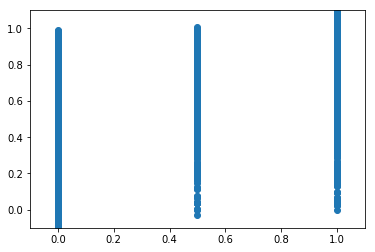

In [54]:
predXtrain = model.predict(Xtrain)
predTrain = []
for i in range(len(predXtrain)):
    predTrain.append(predXtrain[i][0])
plt.xlim((-0.1,1.1))
plt.ylim((-0.1,1.1))
plt.scatter(Ytrain, predTrain)

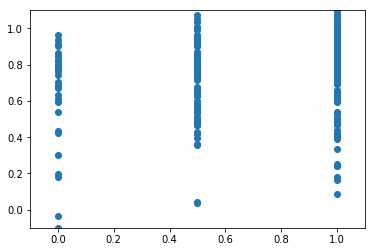

In [55]:
predXvalid = model.predict(Xvalid)
predValid = []
for i in range(len(predXvalid)):
    predValid.append(predXvalid[i][0])
plt.xlim((-0.1,1.1))
plt.ylim((-0.1,1.1))
plt.scatter(Yvalid, predValid)

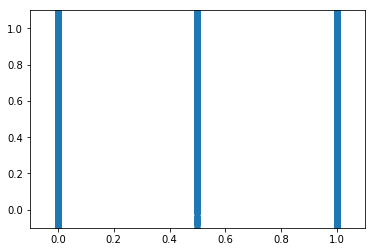

In [56]:
predXtest = model.predict(Xtest)
predTest = []
for i in range(len(predXtest)):
    predTest.append(predXtest[i][0])
plt.xlim((-0.1,1.1))
plt.ylim((-0.1,1.1))
plt.scatter(Ytest, predTest)

In [57]:
train['prediction'] = predTrain
valid['prediction'] = predValid
test['prediction'] = predTest
trainSee = test.copy()

In [58]:
acertos = []
TOLERANCE = 0.2
for i in trainSee.index:
    y = trainSee.loc[i,'y']
    pred = trainSee.loc[i,'prediction']
    if y == 0:
        if abs(pred) < TOLERANCE:
            acertos.append(1)
        else:
            acertos.append(0)
    elif y == 0.5:
        if abs(pred - 0.5) < TOLERANCE:
            acertos.append(1)
        else:
            acertos.append(0)
    elif y == 1:
        if abs(pred - 1) < TOLERANCE:
            acertos.append(1)
        else:
            acertos.append(0)
sum(acertos)/len(acertos)

0.5946414207041644

In [22]:
train['prediction'] = predTrain
test_predictions = train

In [25]:
test['prediction'] =  predTest
test_predictions = test

In [26]:
breakAll = False
yLoja = []
predLoja = []
for store in set(test_predictions.store):
    for score_date in collections.Counter(test_predictions.score_date).keys():
        dataVisit = test_predictions[test_predictions.loc[:,'store'] == store].copy()
        dataVisit = dataVisit[dataVisit.loc[:,'score_date'] == score_date].copy()
        if len(dataVisit) == 0:
            continue
        yLoja.append(dataVisit.y.mean())
        predLoja.append(dataVisit.prediction.mean())


        if str(dataVisit.y.mean()) == 'nan':
            breakAll = True
            break
    if breakAll:
        break
                

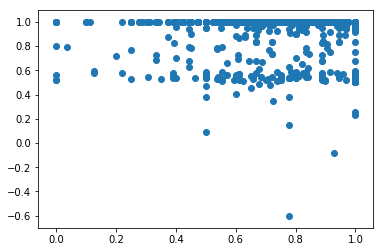

In [27]:
plt.scatter(yLoja, predLoja)